## Background
Analyzing data from the UMD Alumni Association and developing meaningful, data-driven insights to increase first-time attendees and major prospects at events. This was done by identifying variables that correlate with higher event attendance of first-time attendees and major gift prospects, understanding what types of events attracted the target groups and optimizing new and existing events to improve engagement of the target groups. 

In [4]:
#Importing all the required Packages
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn import metrics
from scipy.stats import f_oneway
from matplotlib.pyplot import plot, show
from sklearn.preprocessing import OneHotEncoder
#from wordcloud import WordCloud

 #### Packages Installed

 - A variety of Python packages were employed to complete this analysis. They are:
 - NumPy: array support and manipulation
 - Pandas: data analysis and manipulation
 - SciPy: ANOVA test
 - Matplotlib and Seaborn: statistical plotting and data visualization
 - Scikit Learn: predictive modeling using linear regression
 - Tableau: visualization

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')
#Reading every sheet
df19_20= pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2019-20")
df18_19= pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2018-19")
df17_18= pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2017-18")
df16_17= pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2016-17")
df15_16= pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2015-16")
df14_15= pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2014-15")
df13_14= pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name="2013-14")

/Users/abhijithreddy/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


#### Overview of the imported Dataset

 - The dataset provided is from 07/01/2013-11/30/2019 and contains seven subsets of data, arranged by fiscal year (July 1 – June 30). 
 - The data set outlines each program or event hosted by the Alumni Association and provides general information on the event as well as the event registrants.
 
     **Data Dictionary**
 
 - Activity code - 5-digit code used to track alumni event attendance.  
 - Location code - 4-digit code used with the activity code to denote the region and location an event takes place. 
 - Group code - 3-digit code used with the activity code to denote the event's intended purpose and audience.  
 - First time attendee - who has never previously attended an event as an alumnus/a according to our database. 
 - Major prospect - alumnus/a or friend of the university who has the ability to make a financial gift of $50,000 or more to the university.

# Data Manipulation / Cleansing / Preprocessing

## Merging into 1 df

In [6]:
#Concatenating sheet into single dataframe
#https://stackoverflow.com/questions/25486438/how-to-dynamically-refer-to-dataframes-in-a-for-loop-in-python
df=pd.concat([df19_20,df18_19,df17_18,df16_17,df15_16,df14_15,df13_14],ignore_index=True)
df.shape

(622, 14)

* Merging all Dataframes into one 

## Renaming Attributes

In [14]:
#https://www.listendata.com/2020/09/How-to-rename-columns-in-Pandas.html
df.columns = df.columns.str.replace(' ' , '_')
df

,Event_Name,Activity_Code,Activity_Description,Location_Code,Location_Description,Group_Code,Group_Description,Event_Date,Participated,Average_Age,First_Time_Attendees,Percentage_First_Time_Attendees,Major_Prospects,Percentage_Major_Prospect
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Baltimore Orioles Bullpen Pregame,PEAOB,CP AA-Baltimore Orioles Bullpen Pregame,PDBA,CP DMV- Baltimore,PS9,CP Social- General,2014-05-13,2,31,0,0.000000,0,0.000000
618,50th Reunion,PEZ50,CP AAE-50th Reunion,PDON,CP DMV- On Campus,PS3,CP Social- Emeriti,2014-05-21,76,67,0,0.000000,27,0.355263
619,Ring Ceremony,PEZRC,CP AAE-Ring Ceremony,PDON,CP DMV- On Campus,PSS,CP Social- Students,2014-05-21,68,29,0,0.000000,4,0.058824
620,Terps on the Hill,PEZTH,CP AAE-Terps on the Hill,PDDC,CP DMV- Washington DC,PD9,CP Advocacy- General,2014-06-12,118,34,0,0.000000,16,0.135593


 - Renaming attributes for usability.

## Adding quarter atrribute

In [15]:
#Create new column "quarter" which extracts Event_Date and returns quarter
df['quarter'] = df['Event_Date'].dt.quarter
df[["quarter"]]

,quarter
0,3
1,3
2,3
3,3
4,3
...,...
617,2
618,2
619,2
620,2


- Create new column "quarter" which extracts Event_Date and returns quarter.

## Extracting Month and Year from Event Date

In [16]:
#referenced pandas documentation for datetime manipulation
df['year'] = pd.DatetimeIndex(df['Event_Date']).year
df['month'] = pd.DatetimeIndex(df['Event_Date']).month

- Temporal decomposition: Extracting day, month, year, and quarter from event date attribute.

## Adding age_bin attribute

In [17]:
#checking bounds for average_age to decide bins
df["Average_Age"].describe()

count    622.000000
mean      40.117363
std        9.741459
min       19.000000
25%       33.000000
50%       40.000000
75%       46.000000
max       75.000000
Name: Average_Age, dtype: float64

In [18]:
#referenced pandas documentation to use pd.cut to create bins
df['age_bins'] = pd.cut(x=df['Average_Age'], bins=[22, 29, 39, 49, 59, 69, 79])
df['age_bins'].value_counts()

(39, 49]    226
(29, 39]    220
(49, 59]     70
(22, 29]     66
(59, 69]     19
(69, 79]      4
Name: age_bins, dtype: int64

- Binning age: To analyze distribution of attendees by age groups.

## Check for null values

In [19]:
#Check for null
df.isnull().sum()
df.head(5)

,Event_Name,Activity_Code,Activity_Description,Location_Code,Location_Description,Group_Code,Group_Description,Event_Date,Participated,Average_Age,First_Time_Attendees,Percentage_First_Time_Attendees,Major_Prospects,Percentage_Major_Prospect,quarter,year,month,age_bins
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social-General,2019-07-06,63,52,5,0.079365,12,0.190476,3,2019,7,"(49, 59]"
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev-General,2019-07-10,7,56,1,0.142857,0,0.000000,3,2019,7,"(49, 59]"
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev-General,2019-07-11,28,45,2,0.071429,2,0.071429,3,2019,7,"(39, 49]"
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-11,3,34,0,0.000000,0,0.000000,3,2019,7,"(29, 39]"
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social-General,2019-07-14,22,38,3,0.136364,0,0.000000,3,2019,7,"(29, 39]"


- Missing data: checking for missing data and finding substitutes (no missing data found).

# Descriptive Stastics

## Check Data Types in df

In [20]:
#check data types
df.dtypes

Event_Name                                 object
Activity_Code                              object
Activity_Description                       object
Location_Code                              object
Location_Description                       object
Group_Code                                 object
Group_Description                          object
Event_Date                         datetime64[ns]
Participated                                int64
Average_Age                                 int64
First_Time_Attendees                        int64
Percentage_First_Time_Attendees           float64
Major_Prospects                             int64
Percentage_Major_Prospect                 float64
quarter                                     int64
year                                        int64
month                                       int64
age_bins                                 category
dtype: object

#### Checking data types of attributes
- All categorical variables were object data types and age bins were category data types. All numerical variables were int64 and there was one datetime attribute that can be decomposed temporally. 

## Summary Statistics

In [12]:
#Summary Statistics
df.describe()

,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,44.803859,40.117363,13.456592,0.276282,5.966238,0.102214
std,93.165049,9.741459,41.103936,0.242273,14.123466,0.131444
min,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,33.000000,1.000000,0.068523,0.000000,0.000000
50%,20.000000,40.000000,4.000000,0.237327,1.000000,0.058824
75%,44.750000,46.000000,11.000000,0.444444,5.000000,0.166667
max,1657.000000,75.000000,702.000000,1.000000,131.000000,0.818182


#### Descriptive statistics and outlier detection
- This showed the percentiles and other summary statistics which helped identify attributes that may possess outliers. 

## Histogram for data distribution

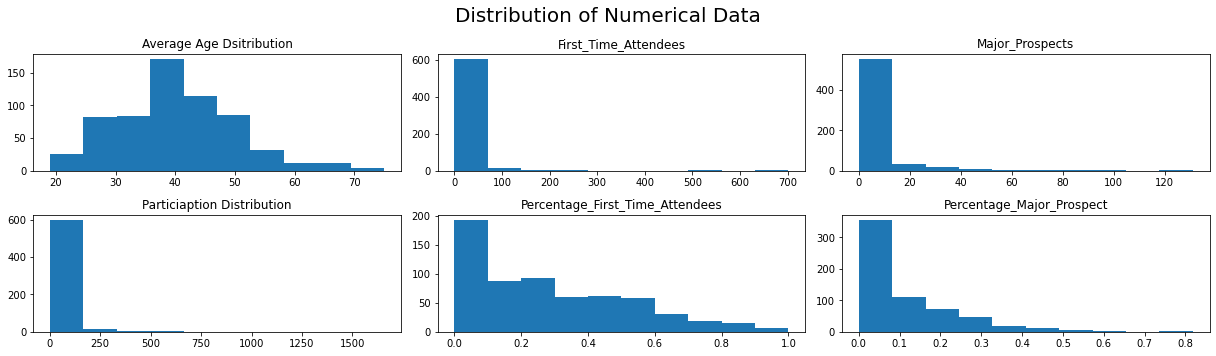

In [21]:
#Check distribution of numerical variables
plt.figure(figsize=(17,5))
plt.suptitle("Distribution of Numerical Data", size=20)

plt.subplot(231)
plt.hist(df["Average_Age"])
plt.title("Average Age Dsitribution")

plt.subplot(232)
plt.hist(df["First_Time_Attendees"])
plt.title("First_Time_Attendees")

plt.subplot(233)
plt.hist(df["Major_Prospects"])
plt.title("Major_Prospects")

plt.subplot(234)
plt.hist(df["Participated"])
plt.title("Particiaption Distribution")

plt.subplot(235)
plt.hist(df["Percentage_First_Time_Attendees"])
plt.title("Percentage_First_Time_Attendees")

plt.subplot(236)
plt.hist(df["Percentage_Major_Prospect"])
plt.title("Percentage_Major_Prospect")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

#### Checkind Data Distribution
* Average age is the only variable with a normal distribution. 
* All others are right-skewed and outliers within them make their shape look so extreme. 
* For further analysis, this data can be normalized by taking log of the variables or exploring removing those outliers.


## Correlation and Heatmap

<Figure size 792x1368 with 0 Axes>

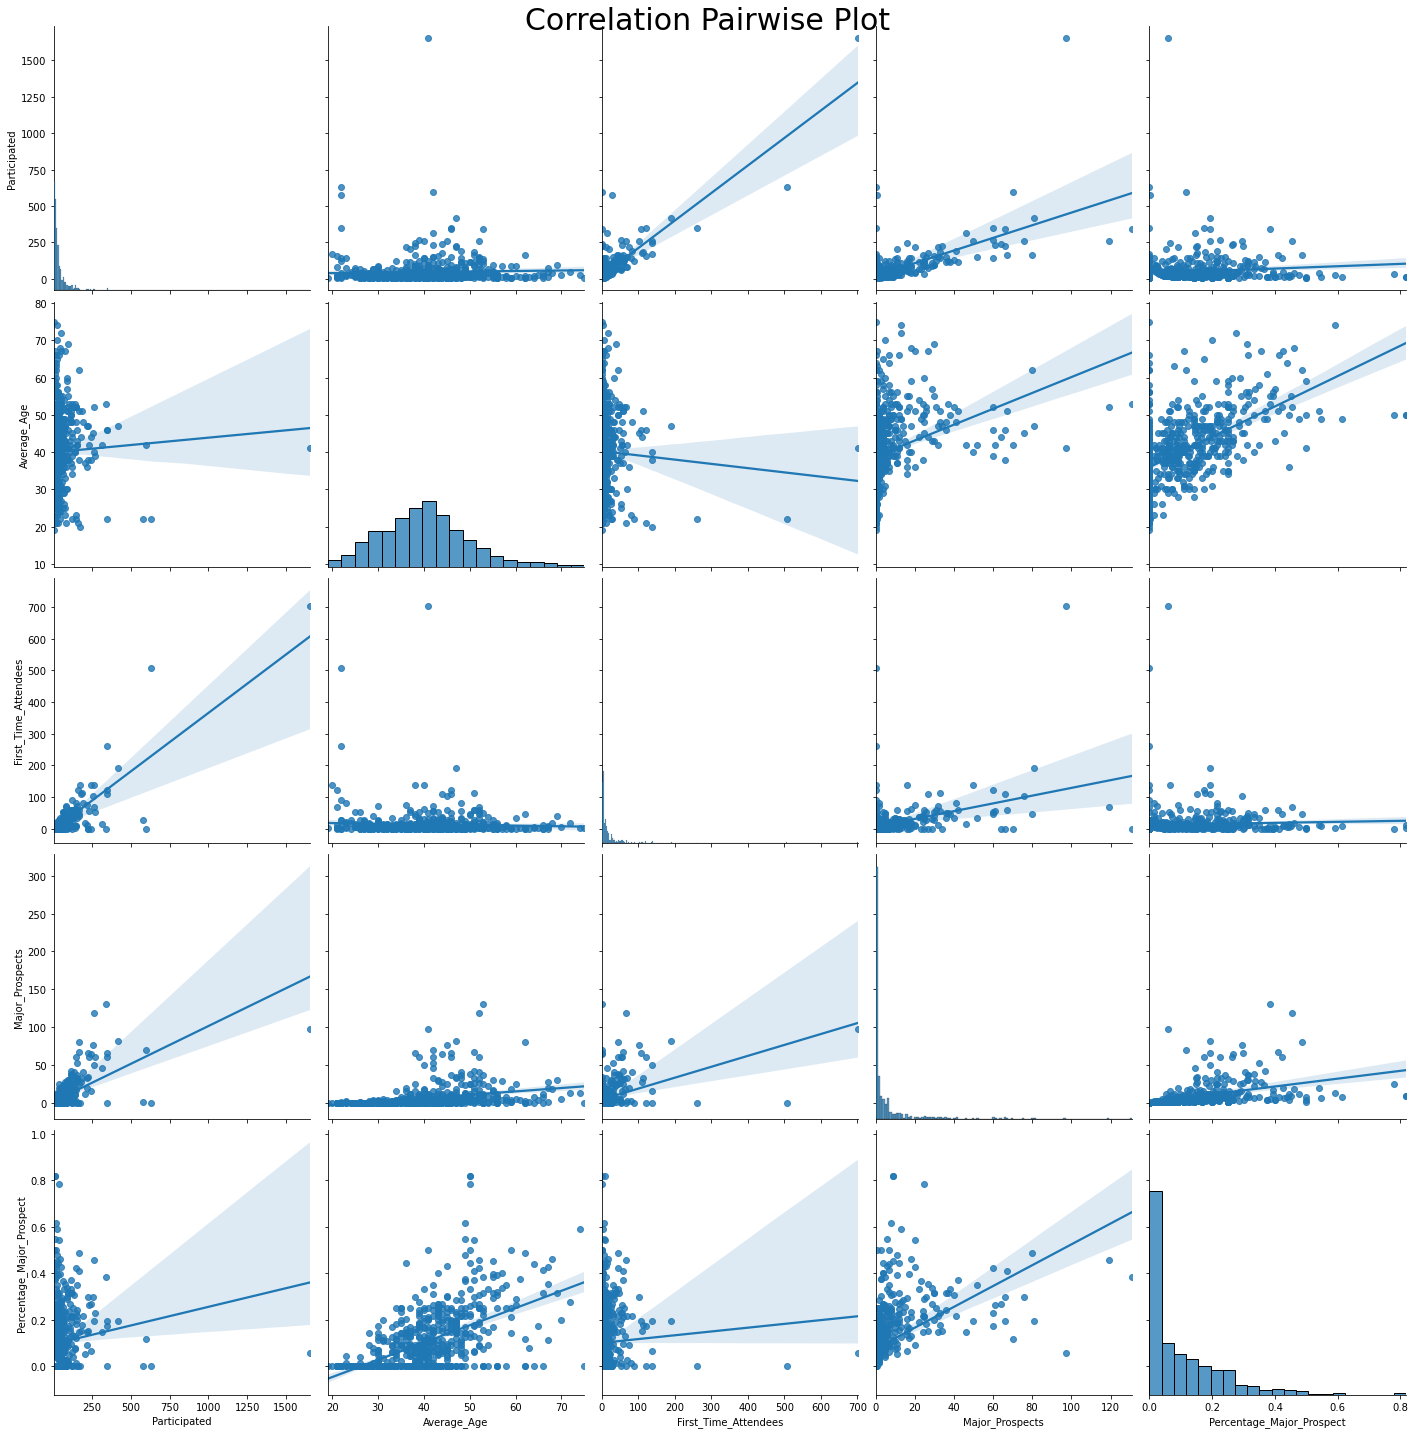

In [22]:
#correlation pairwise plot
plt.figure(figsize=(11,19))
pairwise=sns.pairplot(df,palette="husl",vars=['Participated', 'Average_Age','First_Time_Attendees','Major_Prospects','Percentage_Major_Prospect'],kind="reg",height=4, aspect=1)
pairwise.fig.suptitle("Correlation Pairwise Plot",y=1, fontsize=30)
plt.show()

#### Analyzing correlation between variables Pairwise
 - This showed the distribution of data via a scatter plot with the confidence intervals of the attribute relationships. 
 - This was useful in understanding correlation between attributes and which would be useful to analyze together

Text(0.5, 1.0, 'Correlation Heatmap')

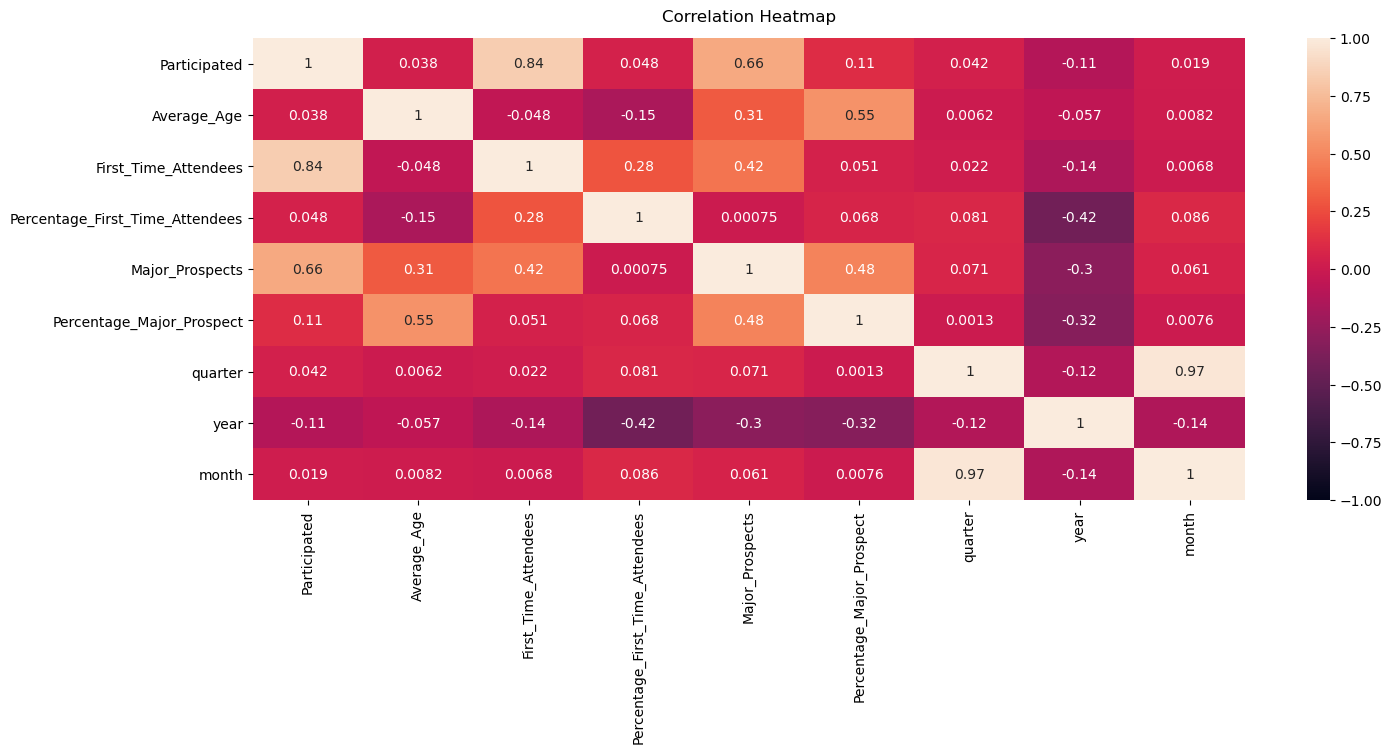

In [90]:
#Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### Correlation Heatmap
- The correlation heatmap was an alternate way of visualizing relationships between attributes and viewing the numerical correlation numbers. 
- It was observed that the highest correlation was between participated with first time attendees (0.84) followed by participated with major prospects (0.66).
- These relationships were further analysed in the predictive modeling stages. 

# Participation Metrics

## By Event

In [23]:
#Treating inconsistency in Activity description
df["Activity_Description"] = df["Activity_Description"].str.strip()
df["Activity_Description"] = df["Activity_Description"].str.replace("- ","-")

In [24]:
#Overall particiaption by event
df.groupby(["Event_Name","Activity_Description"])["Participated"].sum().sort_values(ascending=False).head(5)

Event_Name                    Activity_Description        
Homecoming Tailgate           CP AAE-Homecoming Tailgate      1705
GradBash                      CP AAE-GradBash                 1674
UMD Alumni Virtual Book Club  CP AA-Virtual Book Club         1657
Maryland in Manhattan         CP AAE-Maryland in Manhattan     960
Football Tailgate             CP AAE-Football Tailgate         643
Name: Participated, dtype: int64

In [27]:
#Grouping by Event Name
df_enad=df[['Event_Name','Activity_Description','Participated','First_Time_Attendees','Major_Prospects']]
df_enad.groupby(["Event_Name","Activity_Description"]).agg({'Participated':['sum'],'First_Time_Attendees':['sum'],'Major_Prospects':['sum']})
df_enad.columns=["Event_Name","Activity_Description",'Participated_monthly','First_Time_attendees_monthly','Major_Prospects']
df_enad=df_enad.reset_index()

In [28]:
#Extracting activity from Activity description
df['Activity_extracted'] = (df['Activity_Description'].str.split('-').str[-1])
df['Activity_extracted']= df['Activity_Description'].str.strip()
df['Activity_extracted']


0                CP AAE-Ocean City Summer Party
1                  CP AA-Special Topics Webinar
2                   CP AA-Northern NJ Terps TPN
3      CP AA-Philly Young Alum HH Summer Series
4      CP AA-Philly Terps Ste Night at Ballpark
                         ...                   
617     CP AA-Baltimore Orioles Bullpen Pregame
618                         CP AAE-50th Reunion
619                        CP AAE-Ring Ceremony
620                    CP AAE-Terps on the Hill
621    CP AA-NY Terps Alumnae Networking Dinner
Name: Activity_extracted, Length: 622, dtype: object

In [29]:
# Grouping by activity of the event
df_Activity_Participated=(df.groupby(['Activity_extracted'],as_index=False)['Participated'].sum()).sort_values('Participated')
df_Activity_Participated
df_Activity_first_time=(df.groupby(['Activity_extracted'],as_index=False)['First_Time_Attendees'].sum()).sort_values('First_Time_Attendees')
df_Activity_first_time
df_Activity_Major_prospects=(df.groupby(['Activity_extracted'],as_index=False)['Major_Prospects'].sum()).sort_values('Major_Prospects')
df_Activity_Major_prospects

,Activity_extracted,Major_Prospects
0,CP AA -Jazz at LACMA with Larry Nash,0
144,CP AA-Muslim Alumni Do Good Day,0
145,CP AA-Muslim Alumni Gala,0
156,CP AA-NetWorkout Boston,0
158,CP AA-NetWorkout MoCo,0
...,...,...
317,CP AAE-Member Basketball Pregame Event,131
301,CP AAE-Football Tailgate,172
305,CP AAE-Homecoming Tailgate,277
285,CP AAE-Awards Gala,282


In [30]:
# Reference https://amueller.github.io/word_cloud/
dict1=dict(zip(df_Activity_Participated.Activity_extracted, df_Activity_Participated.Participated))
word_could_dict = dict1
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
fig= plt.figure(figsize=(15,8))
ax=plt.subplot(1,1,1,xticks=[ ],yticks=[ ])
plt.imshow(wordcloud)
plt.title('Wordcloud of event Name according to number of participants')
plt.show()

NameError: name 'WordCloud' is not defined

#### By participation
- Analyzing the event by participation, it was observed that homecoming provided a key opportunity to get alumni involved on campus.
- Additionally, gradbash and virtual book club also showed promise as being events that could be leveraged to drive alumni engagement.
- Lastly, Maryland in Manhattan was an example of an event that garnered tremendous attention for out-of-state events. 
- Other out-of-state events should be modeled after this to increase engagement for alumni in other parts of the country.

In [92]:
#how often does event happen
df.groupby(["Event_Name"])["Activity_Description"].value_counts().sort_values(ascending=False).head(10)

Event_Name                        Activity_Description                  
DC Terps Game Watch               CP AA-DC Terps Game Watch                 12
Baltimore Terps Game Watch        CP AA-Baltimore Terps Game Watch          12
Seattle Terps Game Watch          CP AA-Seattle Terps Game Watch            11
NY Terps Game Watch               CP AA-NY Terps Game Watch                  9
Montgomery Cty Terps Game Watch   CP AA-Montgomery Cty Terps Game Watch      7
DC Terps C-Suite Alumni Meet Up   CP AA-DC Terps C-Suite Alumni Meet Up      6
Football Tailgate                 CP AAE-Football Tailgate                   6
APAAN BBQ                         CP AA-APAAN BBQ                            6
Denver Terps Game Watch           CP AA-Denver Terps Game Watch              5
Football Alumni Zone Open Houses  CP AA-Football Alumni Zone Open Houses     5
Name: Activity_Description, dtype: int64

 * DC Terps Game Watch and Baltimopre Terps Game Watch are the most frequent events. But,the Highest participation is not from these events. So, We recommend to Organise more Homecoming Tailgate, GradBash and Virtual Book club events to increase participation

## By Location

In [32]:
#Participation by Location- drop location description
df.groupby(["Location_Description","Location_Code"])["Participated"].sum().sort_values(ascending=False).head(5)

Location_Description    Location_Code
CP DMV- On Campus       PDON             6145
CP DMV-On Campus        PDON             2437
CP Online-Webinar       POWE             2333
CP DMV- On Campus       PDON             2079
CP Northeast- New York  PNNY             1511
Name: Participated, dtype: int64

In [33]:
#look for inconsistency
Location_Description=df["Location_Description"]
sorted(Location_Description.unique())

['CP DC-Washington DC',
 'CP DMV- Annapolis',
 'CP DMV- Annapolis ',
 'CP DMV- Baltimore',
 'CP DMV- Baltimore ',
 'CP DMV- Blue Ridge ',
 'CP DMV- Eastern Shore',
 'CP DMV- General',
 'CP DMV- General ',
 'CP DMV- Howard County',
 'CP DMV- Montgomery County',
 'CP DMV- Montgomery County ',
 'CP DMV- Northen VA',
 'CP DMV- Northern VA',
 'CP DMV- On Campus',
 'CP DMV- On Campus ',
 "CP DMV- Prince George's County",
 'CP DMV- Southern MD',
 'CP DMV- Washington DC',
 'CP DMV- Washinton DC',
 'CP DMV-Annapolis',
 'CP DMV-Baltimore',
 'CP DMV-Blue Ridge',
 'CP DMV-DC',
 'CP DMV-Eastern Shore',
 'CP DMV-General',
 'CP DMV-Greater CP',
 'CP DMV-Howard County',
 'CP DMV-MoCo',
 'CP DMV-Montgomery County',
 'CP DMV-Northern VA',
 'CP DMV-Northern Virginia',
 'CP DMV-On Campus',
 "CP DMV-Prince George's County",
 'CP DMV-Prince Georges County',
 'CP DMV-Southern MD',
 'CP DMV-Southern Maryland',
 'CP DMV-Washington DC',
 'CP DMV-Western MD',
 'CP International- South Korea',
 'CP International-

In [35]:
#Extracting region from location description
df['region_Extracted'] = (df['Location_Description'].str.split('-').str[0])
df['region_Extracted']=df['region_Extracted'].str.strip()
df['region_Extracted']=df['region_Extracted'].str.split(' ').str[-1]

In [36]:
#Extracting location from Location description
df['Location_Extracted'] = (df['Location_Description'].str.split('-').str[-1])
df['Location_Extracted']= df['Location_Extracted'].str.strip()
df['Location_Extracted'] 

0      Eastern Shore
1            Webinar
2                NNJ
3       Philadelphia
4       Philadelphia
           ...      
617        Baltimore
618        On Campus
619        On Campus
620    Washington DC
621         New York
Name: Location_Extracted, Length: 622, dtype: object

In [37]:
#Grouping by Region
df_location_region_participated=(df.groupby(['region_Extracted'],as_index=False)['Participated'].sum()).sort_values('Participated')
df_location_region_firsttime=df.groupby(['region_Extracted'],as_index=False)['First_Time_Attendees'].sum().sort_values('First_Time_Attendees')
df_location_region_majorprospects=df.groupby(['region_Extracted'],as_index=False)['Major_Prospects'].sum().sort_values('Major_Prospects')
df_location_region_firsttime_and_participated=df_location_region_participated .merge(df_location_region_firsttime)
df_location_region_all=df_location_region_firsttime_and_participated.merge(df_location_region_majorprospects)
#Treating inconsistency
df['region_Extracted'] = np.where((df['region_Extracted'] == 'Norhteast'),'Northeast',df['region_Extracted'])
df['region_Extracted'] = np.where((df['region_Extracted'] == 'DC'),'DMV',df['region_Extracted'])


In [38]:
# Extraction of Location from location description
# Grouping by Participants, first time and Major prospects
df_location_participated=df.groupby(['Location_Extracted'],as_index=False)['Participated'].sum()
df_location_firsttime=df.groupby(['Location_Extracted'],as_index=False)['First_Time_Attendees'].sum()
df_location_majorprospects=df.groupby(['Location_Extracted'],as_index=False)['Major_Prospects'].sum()
df_location_firsttime_and_participated=df_location_participated .merge(df_location_firsttime)
df_location_all=df_location_participated.merge(df_location_majorprospects)
#Treating Indiscrepancy
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'Dallas/Forth Worth'),'Dallas/Fort Worth',df['Location_Extracted'])
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'Prince Georges County'),"Prince George's County",df['Location_Extracted'])
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'DC'),"Washington DC",df['Location_Extracted'])
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'Prince Georges County'),"Prince George's County",df['Location_Extracted'])
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'Southern MD'),"Southern Maryland",df['Location_Extracted'])
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'Northen VA'),"Northern VA",df['Location_Extracted'])
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'Northern VA'),"Northern Virginia",df['Location_Extracted'])
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'San Francsico'),"San Francisco",df['Location_Extracted'])
df['Location_Extracted'] = np.where((df['Location_Extracted'] == 'Washinton DC'),"Washington DC",df['Location_Extracted'])

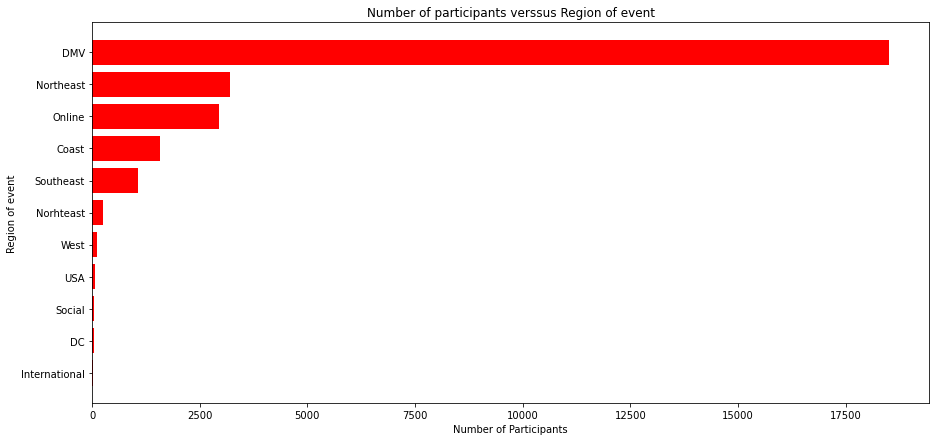

In [39]:
#Plotting Number of Participants with Region of event
plt.figure(figsize=(15,7))
plt.barh(df_location_region_participated['region_Extracted'],df_location_region_participated['Participated'],color=['red'])
plt.ylabel("Region of event")
plt.xlabel("Number of Participants")
plt.title("Number of participants verssus Region of event")
plt.show()

In [40]:
#Count of the regions
df['region_Extracted'].value_counts()

DMV              352
Coast             89
Northeast         79
Southeast         43
Online            42
West              10
USA                4
International      2
Social             1
Name: region_Extracted, dtype: int64

#### By Participation
- It was observed that participants primarily attended events in the DMV area and online. 
- There are continued discrepancies with generalized broad categories like USA, DC and Social that do not align well with location segmentation. 
- It is recommended to reassign these to more specific, existing categories for stronger segmentation. 

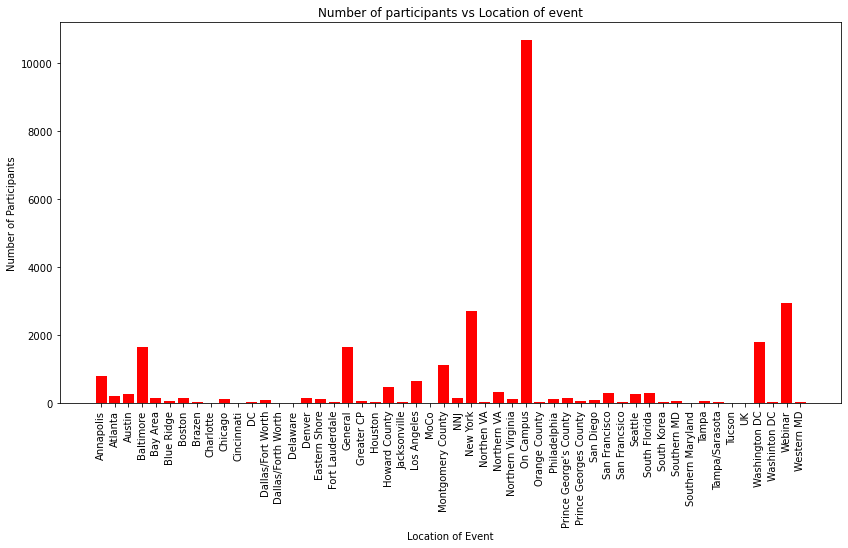

In [41]:
#Number of participants vs Location of event
plt.figure(figsize=(14,7))
plt.bar(df_location_firsttime_and_participated['Location_Extracted'],df_location_firsttime_and_participated['Participated'],color=['red'])
plt.xlabel("Location of Event")
plt.ylabel("Number of Participants")
plt.title("Number of participants vs Location of event")
plt.xticks(rotation=90)
plt.show()

In [42]:
#Count of Locations
df['Location_Extracted'].value_counts()

On Campus                 115
General                    56
Baltimore                  52
Washington DC              43
Webinar                    41
New York                   37
Montgomery County          37
Seattle                    30
Los Angeles                21
Northern Virginia          16
Annapolis                  15
San Francisco              15
South Florida              14
Philadelphia               11
Dallas/Fort Worth          11
Boston                     10
Howard County              10
Denver                     10
NNJ                         9
Bay Area                    7
Prince George's County      7
San Diego                   6
Chicago                     6
Southern Maryland           5
Blue Ridge                  5
Atlanta                     5
Eastern Shore               4
Tampa                       4
Austin                      2
Tampa/Sarasota              2
Tucson                      2
Houston                     2
Jacksonville                1
Orange Cou

#### By participation
- Most participants attended events on campus followed by webinars (online events). There is also relatively high participation in New York. 
- Inconsistencies in this segmentation are also prominent. It is recommended to re-segment by either city or region. 
- Current segmentation includes cities, regions, countries, counties and duplicates due to data entry errors. 
- The prominence of first-time attendees in the DMV area can be attributed to high participation on-campus. 
- This could be treated as an outlier skewing the data.

## By Age

In [43]:
#Grouping by Age Bins
df_age_participated=df.groupby(['age_bins'],as_index=False)['Participated'].sum()
df_age_firsttime=df.groupby(['age_bins'],as_index=False)['First_Time_Attendees'].sum()
df_age_majorprospects=df.groupby(['age_bins'],as_index=False)['Major_Prospects'].sum()
df_age_all=df_age_participated.merge(df_age_firsttime)
df_age_all['Percentage_first_time']=df_age_all['First_Time_Attendees']/df_age_all['Participated']

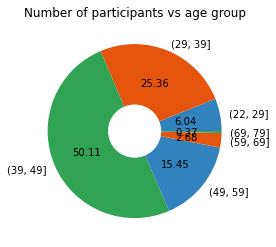

In [44]:
#plotting Number of participants with Age 
cmap = plt.get_cmap("tab20c")
my_circle = plt.Circle( (0,0), 0.3, color='white')
outer_colors = cmap(np.arange(3)*4)
plt.pie(df_age_all['Participated'], labels=df_age_all['age_bins'],colors=outer_colors,autopct='%.2f')
plt.title("Number of participants vs age group")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### By Participation
- 50.11% of participants were between 39-49 years of age. 
- The next group was 29-39 year olds.
- Overall, it seems like participants seem to drop off post-graduation and then get re-engaged with the university closer to mid-career. 

## By Group Description

 * The Group description consists information about the Purpose of the Event and also info of the Intended audience of the Event So, we extracted both Event's intended purpose and also the Intended audience from Group description as they are seperated by a delimiter

In [45]:
#Extracting Purpose from group code
df['purpose_Extracted'] = (df['Group_Description'].str.split('-').str[0])
df['purpose_Extracted']=df['purpose_Extracted'].str.strip()
df['purpose_Extracted']=df['purpose_Extracted'].str.split(' ').str[-1]
df['purpose_Extracted'].value_counts()
#Treating inconsistency in data
df['purpose_Extracted'] = np.where((df['purpose_Extracted'] == 'Prodev'),'ProDev',df['purpose_Extracted'])
df['purpose_Extracted'] = np.where((df['purpose_Extracted'] == 'Stewarship'),'Stewardship',df['purpose_Extracted'])
df['purpose_Extracted'] = np.where((df['purpose_Extracted'] == 'Affiniy'),'Affinity',df['purpose_Extracted'])
df['purpose_Extracted'].value_counts()
#Grouping by Purpose of the Event
df_group_purpose_participated=df.groupby(['purpose_Extracted'],as_index=False)['Participated'].sum()
df_group_purpose_firsttime=df.groupby(['purpose_Extracted'],as_index=False)['First_Time_Attendees'].sum()
df_group_purpose_majorprospects=df.groupby(['purpose_Extracted'],as_index=False)['Major_Prospects'].sum()
df_purpose_firsttime_and_participated=df_group_purpose_firsttime .merge(df_group_purpose_participated)
df_purpose_all=df_purpose_firsttime_and_participated.merge(df_group_purpose_majorprospects)
df_purpose_firsttime_and_participated['Percentage_first_time']=df_purpose_firsttime_and_participated['First_Time_Attendees']/df_purpose_firsttime_and_participated['Participated']


In [46]:
#Extracting audience from group code- TARGET AUDIENCE
df['Extracted_Group'] = (df['Group_Description'].str.split('-').str[-1])
df['Extracted_Group'].value_counts().head()
df['Extracted_Group']=df['Extracted_Group'].str.strip()
df['Extracted_Group'].value_counts()
#Removing redundant Intended audience names -data cleaning
df['Extracted_Group'] = np.where((df['Extracted_Group'] == 'Student'),'Students',df['Extracted_Group'])
df['Extracted_Group'] = np.where((df['Extracted_Group'] == 'Emeriti'),'Emiriti',df['Extracted_Group'])
df['Extracted_Group'] = np.where((df['Extracted_Group'] == 'Genera'),'General',df['Extracted_Group'])
df['Extracted_Group'] = np.where((df['Extracted_Group'] == 'StuAlum'),'Students & Alumni',df['Extracted_Group'])
df['Extracted_Group'] = np.where((df['Extracted_Group'] == 'Students'),'Students & Alumni',df['Extracted_Group'])
df['Extracted_Group'] = np.where((df['Extracted_Group'] == 'Alumnae'),'Students & Alumni',df['Extracted_Group'])
df['Extracted_Group'].value_counts()

#Extracting intended audience from Group description
df_group_ep=df.groupby(['Extracted_Group'],as_index=False)['Participated'].sum()
df_group_ef=df.groupby(['Extracted_Group'],as_index=False)['First_Time_Attendees'].sum()
df_group_major_prospects=df.groupby(['Extracted_Group'],as_index=False)['Major_Prospects'].sum()
df_audience_firsttime_and_participated=df_group_ef .merge(df_group_ep)
df_audience_all=df_audience_firsttime_and_participated.merge(df_group_major_prospects)
df_audience_firsttime_and_participated['Percentage_first_time']=df_audience_firsttime_and_participated['First_Time_Attendees']/df_audience_firsttime_and_participated['Participated']

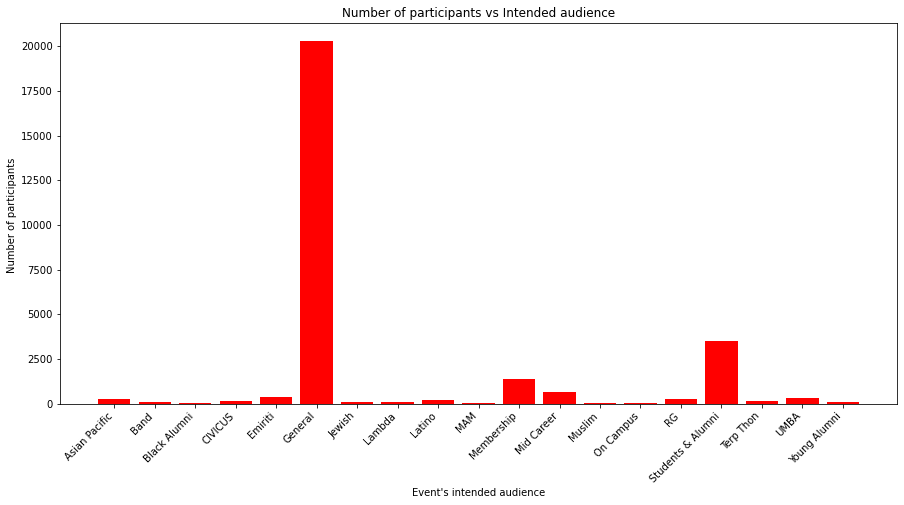

In [47]:
#Plotting Number of participants with Intended audience
plt.figure(figsize=(15,7))
plt.bar(df_group_ep ['Extracted_Group'],df_group_ep ['Participated'],color=['red'])
plt.xlabel("Event's intended audience")
plt.ylabel("Number of participants ")
plt.title("Number of participants vs Intended audience")
plt.xticks(rotation=45,ha='right')
plt.show()




#### By participation 
- Generalization in the segmentation makes this data hard to interpret. 
- It is recommended to dissect the “General” category into more specific, meaningful segments.
- Much of the data in this category can be distributed to relevant existing categories to provide a more balanced picture of the intended audience. 
- There are also redundant categories like “students and alumni” that need to be revisited.
- Overall, trends even on the first time attendees and segment levels (shown below) do not have distinguishable traits due to the data distribution and skewness due to the general category. 

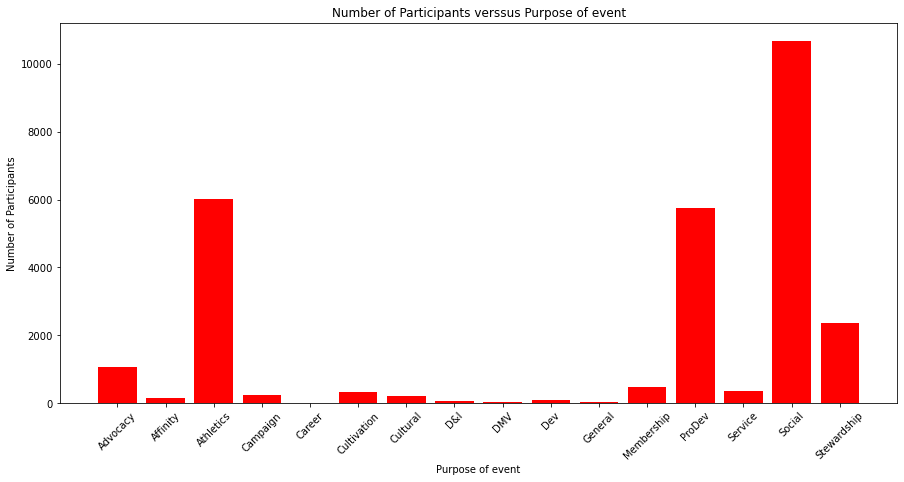

In [48]:
#Plotting number of Participants with Purpose of the event
plt.figure(figsize=(15,7))
plt.style.use('default')
plt.bar(df_group_purpose_participated['purpose_Extracted'],df_group_purpose_participated['Participated'],color=['red'])
plt.xlabel("Purpose of event")
plt.ylabel("Number of Participants")
plt.title("Number of Participants verssus Purpose of event")
plt.xticks(rotation=45)
plt.show()

#### By Participation
- In terms of intended purpose, most popular events are social and athletic. 
- This category can be leveraged to keep overall participants engaged with the university. 
- The more-specific categories can be used to target specific groups, like stewardship for major prospects and professional development for first time attendees. 

## By Month of the Event Date

In [49]:
df1=df[['Percentage_First_Time_Attendees','Participated','First_Time_Attendees','Major_Prospects','year','month','Event_Date']]

In [50]:
#Grouping the data by year and month
df_ym=df1.groupby(['year','month']).agg({'Participated':['sum'],'First_Time_Attendees':['sum'],'Major_Prospects':['sum']})
df_ym.columns=['Participated_monthly','First_Time_attendees_monthly','Major_Prospects']
df_ym=df_ym.reset_index()

In [51]:
#Grouping monthly to calculate number of participants, First time attendees and number of Major prospects every month.
df_ym_participated=df1.groupby(['month'],as_index=False)['Participated'].sum()
df_ym_firsttime=df1.groupby(['month'],as_index=False)['First_Time_Attendees'].sum()
df_ym_majorprospects=df1.groupby(['month'],as_index=False)['Major_Prospects'].sum()

#Merging dataframes to calculate the percentage of first tie attendees every month
df_ym_all=df_ym_participated.merge(df_ym_firsttime)
df_ym_all['Percentage_first_time']=df_ym_all['First_Time_Attendees']/df_ym_all['Participated']

#Calculating percentage of first time attendees
df_ym_all['Percentage']=df_ym_all['First_Time_Attendees']/df_ym_all['Participated']


/Users/abhijithreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


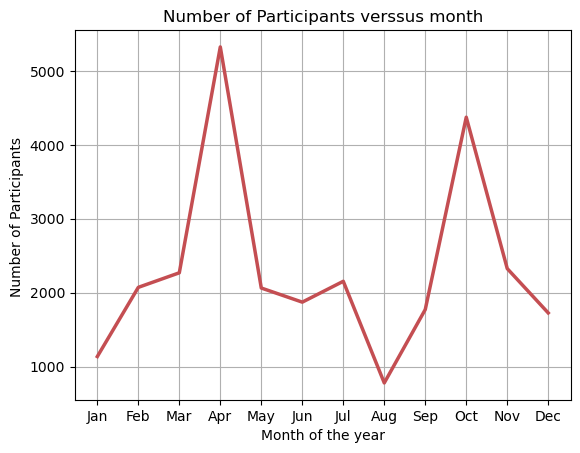

In [52]:
#Plotting number of Participants each month 
sns.set(rc = {'figure.figsize':(12,7)})
plt.style.use('default')
plot=sns.lineplot(df_ym_participated['month'],df_ym_participated['Participated'],color='r',linewidth=2.5)
plot.set(xlabel='Month of the year',ylabel='Number of Participants ',title='Number of Participants verssus month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

#### By Paricipation
- Overall participation shows peaks in April and October and notably low engagement in August.

## By Day of the Event

In [53]:
#Extracting day of the event Date
df1['Day_of_Week'] = pd.to_datetime(df1['Event_Date'], format='%m/%d/%y').dt.day_name()
df1.head()

<ipython-input-53-e3f13f33437f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day_of_Week'] = pd.to_datetime(df1['Event_Date'], format='%m/%d/%y').dt.day_name()


,Percentage_First_Time_Attendees,Participated,First_Time_Attendees,Major_Prospects,year,month,Event_Date,Day_of_Week
0,0.079365,63,5,12,2019,7,2019-07-06,Saturday
1,0.142857,7,1,0,2019,7,2019-07-10,Wednesday
2,0.071429,28,2,2,2019,7,2019-07-11,Thursday
3,0.000000,3,0,0,2019,7,2019-07-11,Thursday
4,0.136364,22,3,0,2019,7,2019-07-14,Sunday


/Users/abhijithreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


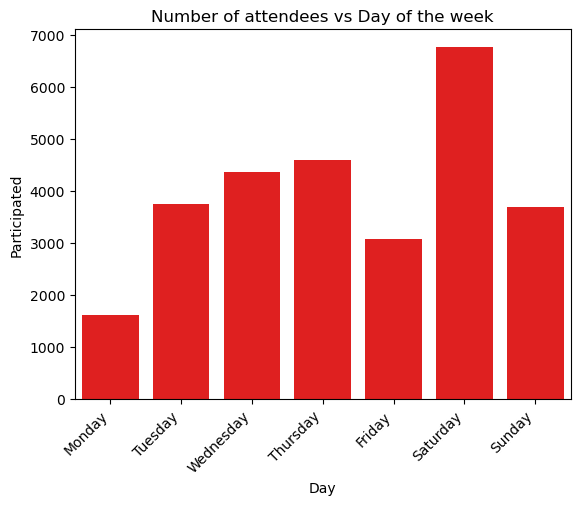

In [54]:
#Number of Participants every Day during all the years
df_day=df1
df_day_participated=df1.groupby(['Day_of_Week'],as_index=False)['Participated'].sum()
df_day_firsttime=df1.groupby(['Day_of_Week'],as_index=False)['First_Time_Attendees'].sum()
df_day_majorprospects=df1.groupby(['Day_of_Week'],as_index=False)['Major_Prospects'].sum()
df_day_all=df_day_participated.merge(df_day_firsttime)
df_day_all['Percentage_first_time']=df_day_all['First_Time_Attendees']/df_day_all['Participated']
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.set(rc = {'figure.figsize':(12,7)})
plt.style.use('default')
plot=sns.barplot(df_day_participated['Day_of_Week'],df_day_participated['Participated'],order = day_order,ci=None,color='red')
plot.set(xlabel='Day',ylabel='Participated',title='Number of attendees vs Day of the week')
plt.xticks(rotation=45,ha='right')
plt.show()



#### By Participation
- Overall, participation is strong on weekends, especially Saturday.
- There is also strong engagement on Thursdays as well. 

# First Time Attendence Metrics

## By Event

In [25]:
#overall
df.groupby(["Event_Name"])["First_Time_Attendees"].sum().sort_values(ascending=False).head(15)

Event_Name
GradBash                            885
UMD Alumni Virtual Book Club        702
Homecoming Tailgate                 420
Football Tailgate                   211
Ring Ceremony                       165
Member Basketball Pregame Event     164
Maryland Day                        140
Meet Maryland Happy Hour, Austin    139
Fun Friday                          138
DC Terps Game Watch                 134
Terps on the Hill                   122
Thank-A-Donor                       121
Lifetime Member Wall Unveiling      112
Maryland in Manhattan               110
McFarland Movie Screening           110
Name: First_Time_Attendees, dtype: int64

In [ ]:
#Word cloud of Event according to number of first time attendees
dict1=dict(zip(df_Activity_first_time.Activity_extracted, df_Activity_first_time.First_Time_Attendees))
word_could_dict = dict1
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
fig= plt.figure(figsize=(15,8))
ax=plt.subplot(1,1,1,xticks=[ ],yticks=[ ])
plt.imshow(wordcloud)
plt.title('Word cloud of Event according to number of first time attendees' )
plt.show()


#### By first time attendees
- We see gradbash as a premier event to get first time attendees. This may be because this is one of the first events people attend as alumni. 
- In line with overall participation, we see football tailgating as a good source of first time attendees.
- Lastly, virtual events like the virtual book club seem to appeal to this group, potentially due to its convenience factor.

## By location

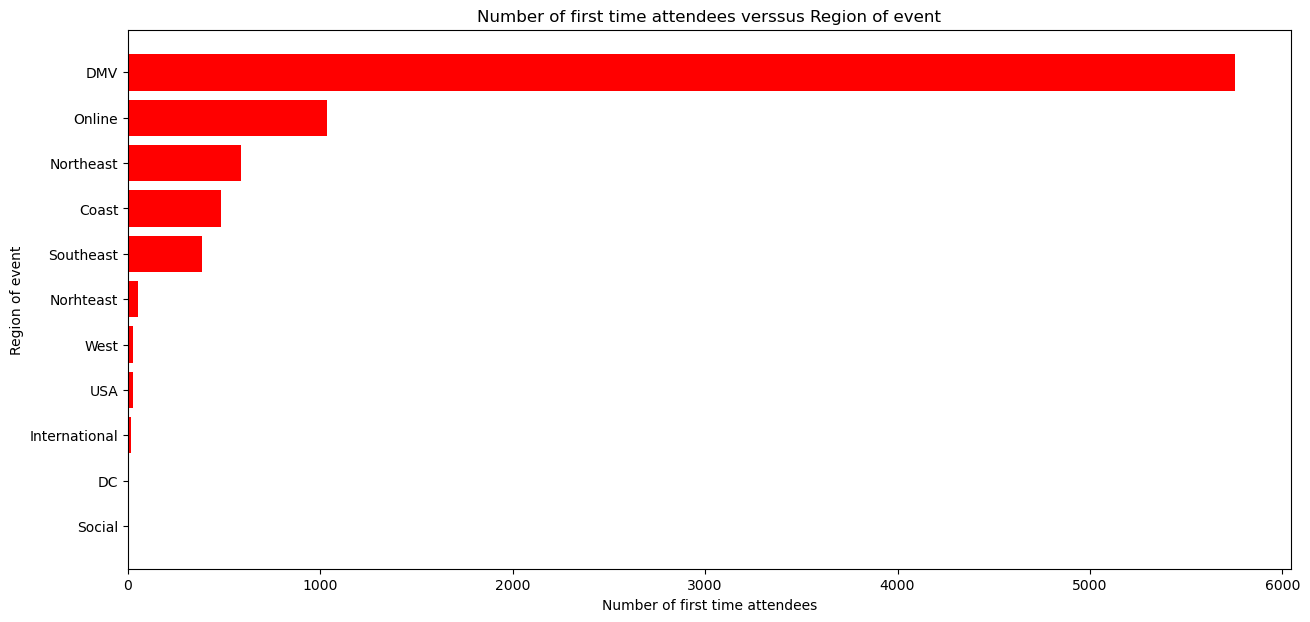

In [55]:
#Plotting Number of first time attendees with Region of event
plt.figure(figsize=(15,7))
plt.barh(df_location_region_firsttime['region_Extracted'],df_location_region_firsttime['First_Time_Attendees'],color=['red'])
plt.ylabel("Region of event")
plt.xlabel("Number of first time attendees")
plt.title("Number of first time attendees verssus Region of event")
plt.show()

#### By first time attendees
- First time attendees show preference to the DMV area and then online events, relatively like overall participation. 
- It is recommended to leverage online events as it has shown high performance in recent years and adds a convenience factor that first time attendees would utilize since they do not need to go out of their way to attend events.

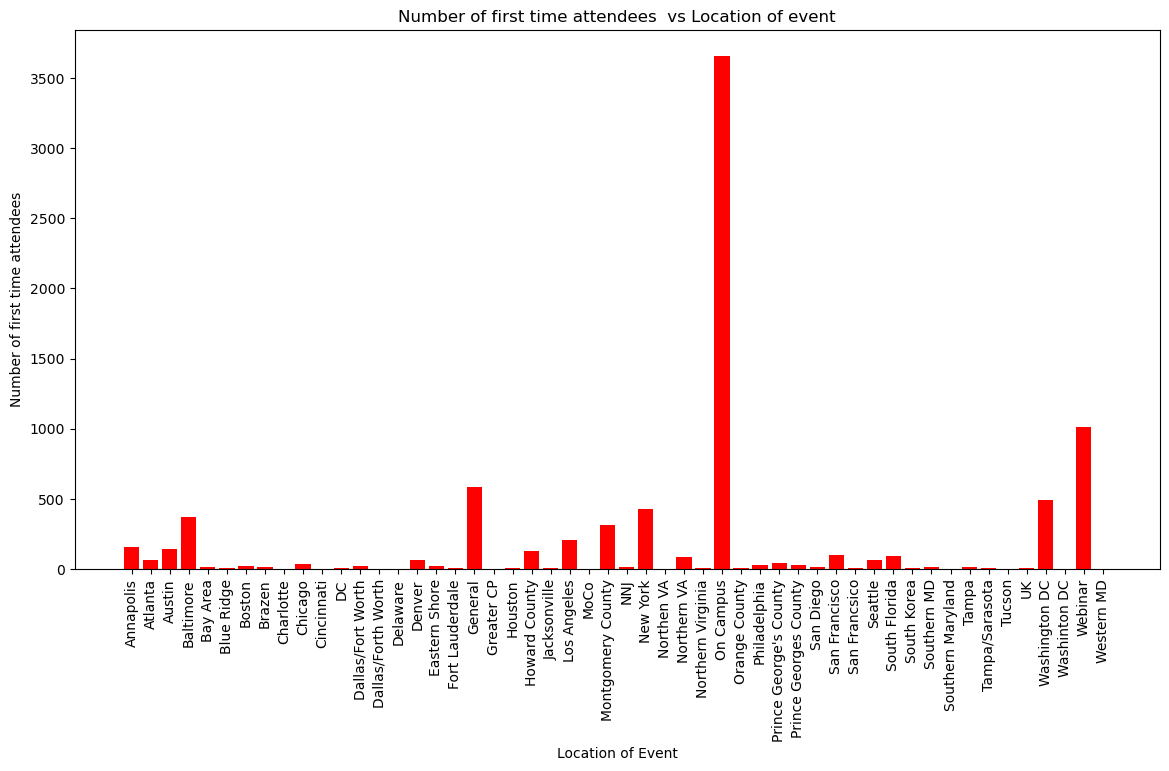

In [56]:
#Number of first time attendees  vs Location of event
plt.figure(figsize=(14,7))
plt.bar(df_location_firsttime_and_participated['Location_Extracted'],df_location_firsttime_and_participated['First_Time_Attendees'],color=['red'])
plt.xlabel("Location of Event")
plt.ylabel("Number of first time attendees")
plt.title("Number of first time attendees  vs Location of event")
plt.xticks(rotation=90)
plt.show()

#### By first time attendees
- A similar trend is observed in location preferences for first time attendees with on campus and webinars being the highest.
- Segmentation in location should be specified better to develop better insights and for future use of the alumni foundation. 

## By Age

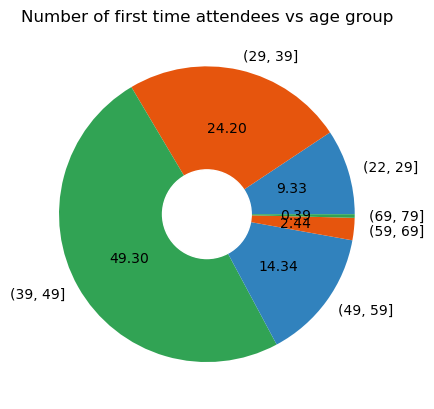

In [58]:
#Number of first time attendees 
cmap = plt.get_cmap("tab20c")
my_circle = plt.Circle( (0,0), 0.3, color='white')
outer_colors = cmap(np.arange(3)*4)
plt.pie(df_age_all['First_Time_Attendees'], labels=df_age_all['age_bins'],colors=outer_colors,autopct='%.2f')
plt.title("Number of first time attendees vs age group")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### By first time attendees
- There is a similar distribution for first time attendees as is for overall participants.

## By Group Description

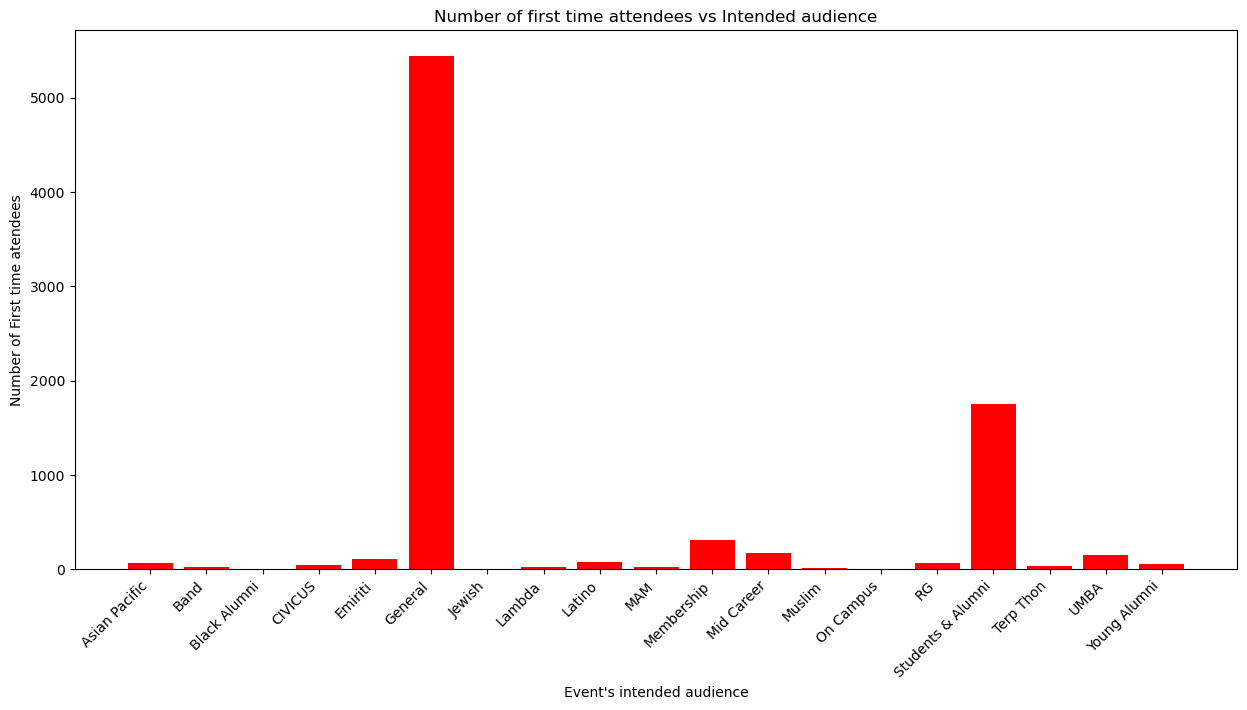

In [59]:
#Plotting Number of first time attendees with Intended audience
plt.figure(figsize=(15,7))
plt.bar(df_group_ef ['Extracted_Group'],df_group_ef ['First_Time_Attendees'], color=['red'])
plt.xlabel("Event's intended audience")
plt.ylabel("Number of First time atendees")
plt.title("Number of first time attendees vs Intended audience")
plt.xticks(rotation=45,ha='right')
plt.show()

#### By Participation
- Generalization in the segmentation makes this data hard to interpret. 
- It is recommended to dissect the “General” category into more specific, meaningful segments.
- Much of the data in this category can be distributed to relevant existing categories to provide a more balanced picture of the intended audience.
- There are also redundant categories like “students and alumni” that need to be revisited.
- Overall, trends even on the first time attendees and segment levels (shown below) do not have distinguishable traits due to the data distribution and skewness due to the general category. 

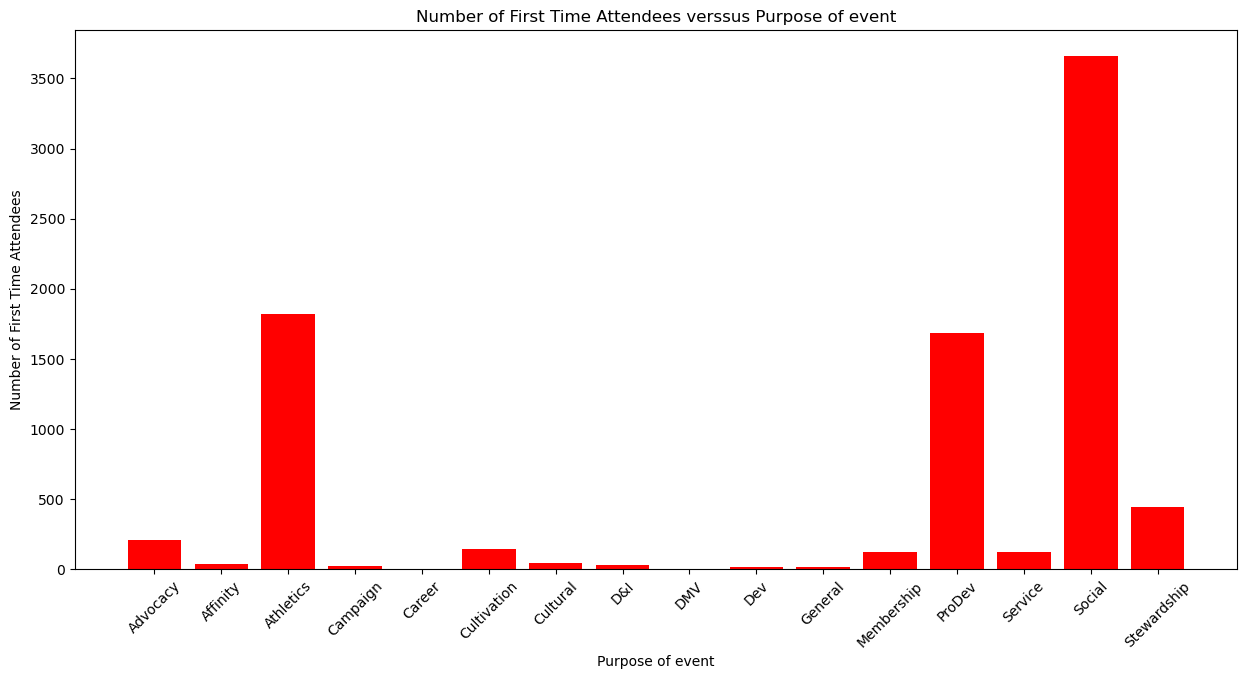

In [60]:
#Plotting Purpose of the event with Number of first time attendees
plt.figure(figsize=(15,7))
plt.bar(df_group_purpose_firsttime['purpose_Extracted'],df_group_purpose_firsttime['First_Time_Attendees'],color='red')
plt.xlabel("Purpose of event")
plt.ylabel("Number of First Time Attendees")
plt.title("Number of First Time Attendees verssus Purpose of event")
plt.xticks(rotation=45)
plt.show()

#### By first time attendees
- Other than social and athletics events, there is a strong trend for professional development engagement for first time attendees.
- It seems like they are eager to network with fellow alumni and reconnect in that aspect. 

## By Month of the Event Date

/Users/abhijithreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


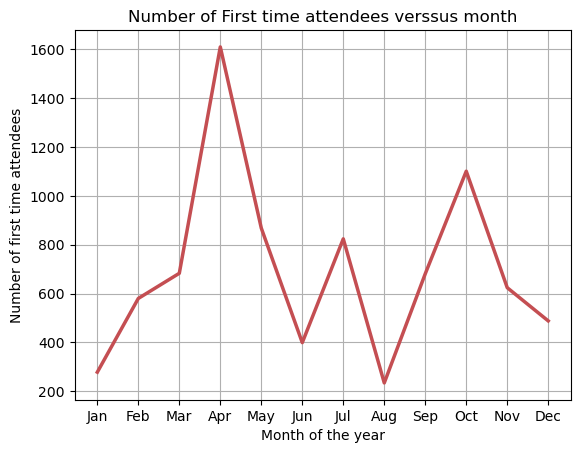

In [61]:
#Plotting Total Number of First time attendees each month
sns.set(rc = {'figure.figsize':(12,7)})
plt.style.use('default')
plot=sns.lineplot(df_ym_firsttime['month'],df_ym_firsttime['First_Time_Attendees'],color='r',linewidth=2.5)
plot.set(xlabel='Month of the year',ylabel='Number of first time attendees',title='Number of First time attendees verssus month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()



#### By first time attendees
- We see a similar trend in April and October for high involvement of first time attendees. 

## By Day of the event

/Users/abhijithreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


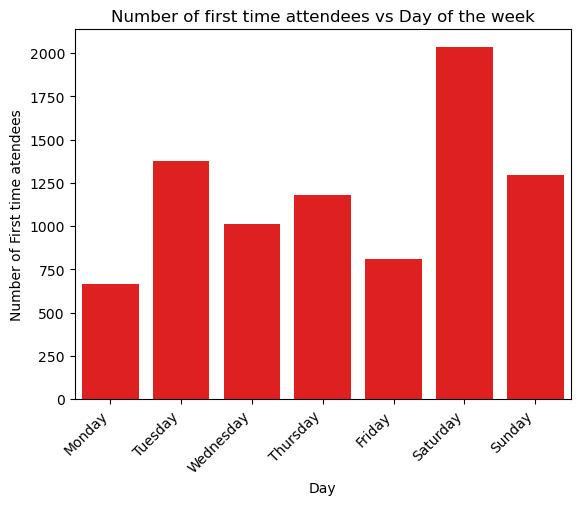

In [62]:
#Number of First time attendees Every Day during all the years
sns.set(rc = {'figure.figsize':(12,7)})
plt.style.use('default')
plot=sns.barplot(df_day_firsttime['Day_of_Week'],df_day_firsttime['First_Time_Attendees'],order = day_order,ci=None,color='red')
plot.set(xlabel='Day',ylabel='Number of First time atendees',title='Number of first time attendees vs Day of the week')
plt.xticks(rotation=45,ha='right')
plt.show()



#### By first time attendees
- For this group, Saturdays are a good day for engagements and surprisingly Tuesdays. These trends in attendance clearly indicate this.

# Major Prospects Metrics

## By Event

In [63]:
#overall
df.groupby(["Event_Name"])["Major_Prospects"].sum().sort_values(ascending=False).head(5)

Event_Name
Homecoming Tailgate                 277
Maryland in Manhattan               251
Awards Gala                         250
Member Basketball Pregame Event     121
Football Tailgate                   114
Name: Major_Prospects, dtype: int64

In [ ]:
#Word cloud of Event according to number of major prospects
dict1=dict(zip(df_Activity_Major_prospects.Activity_extracted, df_Activity_Major_prospects.Major_Prospects))
word_could_dict = dict1
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
fig= plt.figure(figsize=(15,8))
ax=plt.subplot(1,1,1,xticks=[ ],yticks=[ ])
plt.imshow(wordcloud)
plt.title('Word cloud of Event according to number of major prospects' )
plt.show()


#### By major prospects
- Major prospects tend to attend events that appeal to status, like the awards gala and Maryland in manhattan. 
- These types of ‘status’ events should be marketed to increase engagement for this segment. 
- Lastly, athletic events that have overall strong participation also appeal to this group. 

## By location

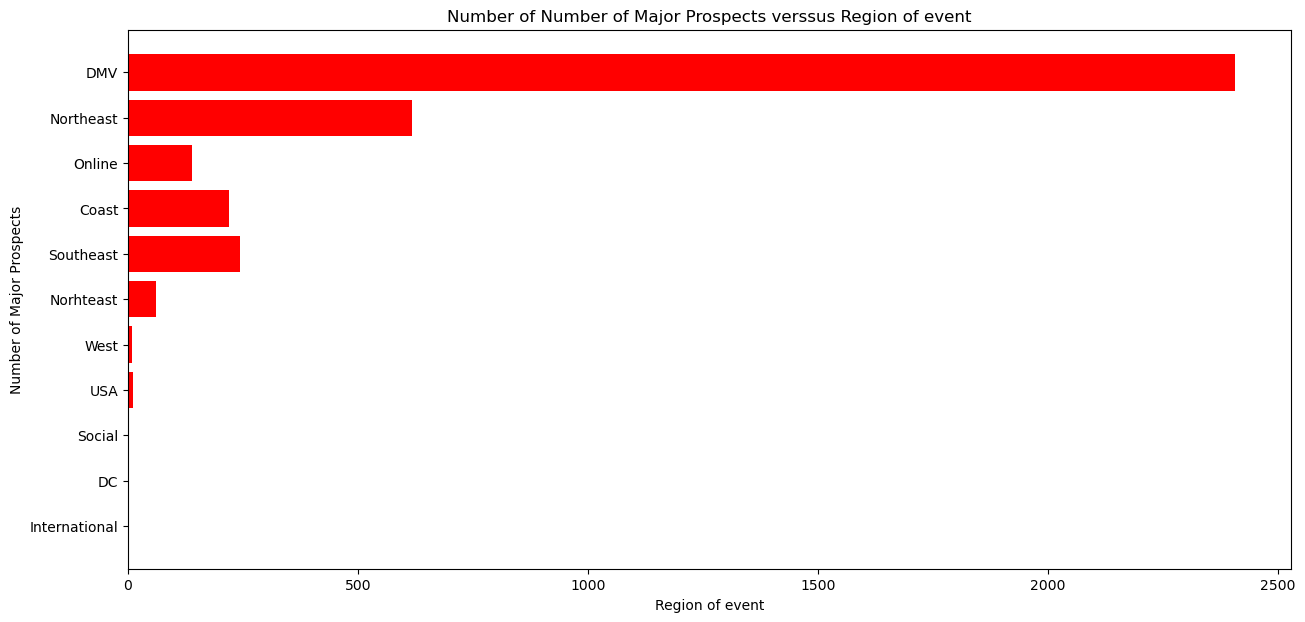

In [64]:
#Plotting Number of major prospects with Region of event
plt.figure(figsize=(15,7))
plt.barh(df_location_region_all['region_Extracted'],df_location_region_all['Major_Prospects'],color=['red'])
plt.xlabel("Region of event")
plt.ylabel("Number of Major Prospects")
plt.title("Number of Number of Major Prospects verssus Region of event")
plt.show()


#### By major prospects
- Major prospects seem to favor the Northeast after the DMV area unlike first time attendees who favor online events.
- The concentration of high income earners in the Northeast make it a hotbed to target for major prospect engagement. 

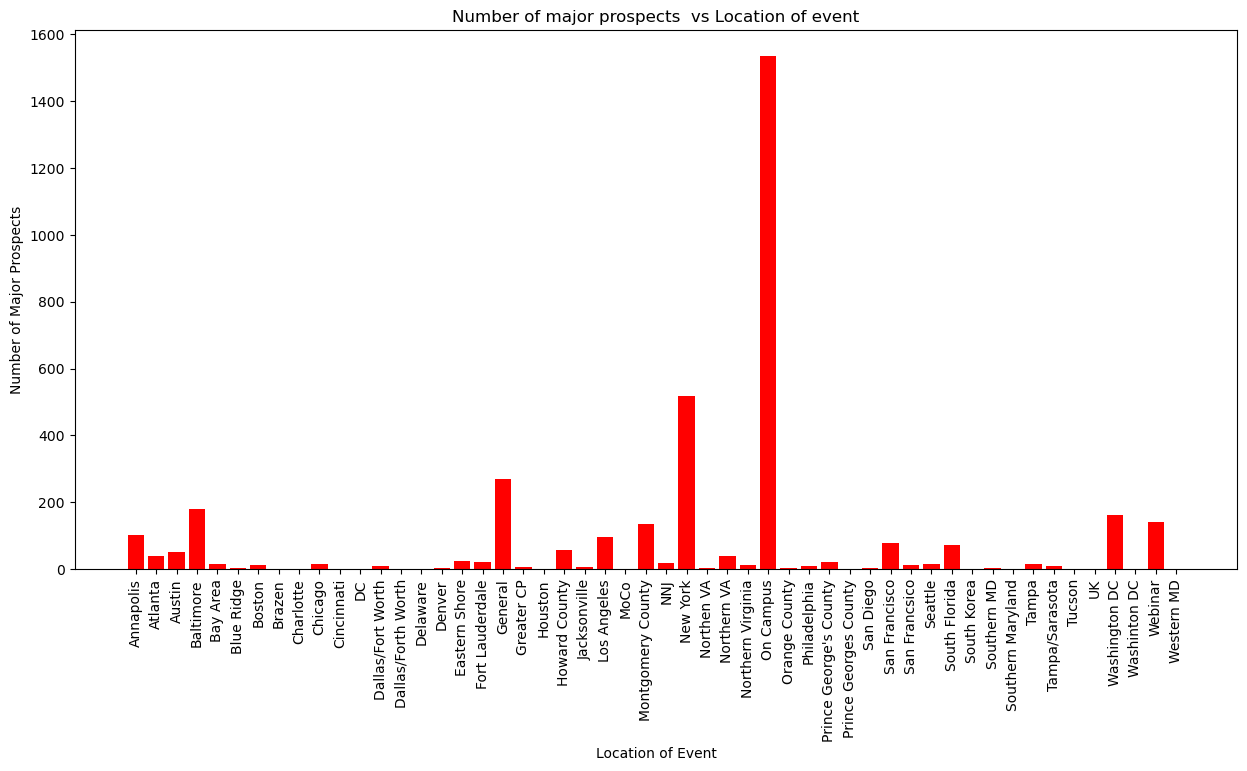

In [65]:
#Number of Major prospects vs Location of event
plt.figure(figsize=(15,7))
plt.bar(df_location_all['Location_Extracted'],df_location_all['Major_Prospects'],color=['red'])
plt.xlabel("Location of Event")
plt.ylabel("Number of Major Prospects")
plt.title("Number of major prospects  vs Location of event")
plt.xticks(rotation=90)
plt.show()

#### By major prospects
- We see a shift in trend with major prospects with most of them preferring New York after on campus. 
- This group does not show any preference for online events.
- There is a need for stronger segmentation to remove outliers (counties, and other countries).

## By Age

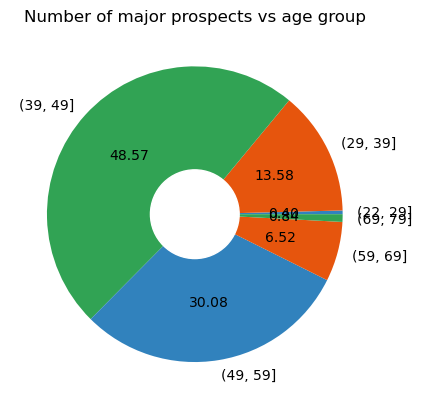

In [66]:
#Plotting Age with Number of Major prospects

cmap = plt.get_cmap("tab20c")
my_circle = plt.Circle( (0,0), 0.3, color='white')
outer_colors = cmap(np.arange(3)*4)
plt.pie(df_age_majorprospects['Major_Prospects'], labels=df_age_majorprospects['age_bins'],colors=outer_colors,autopct='%.2f')
plt.title("Number of major prospects vs age group")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()



#### By major prospects
- There is a significant increase in the 49-59 age bin (30%) compared to overall participants and first time attendees. 
- This bin is almost double the size of the other groups showing that mid-career alumni are key target groups to be leveraged for major prospect donation. 

## By Group Description

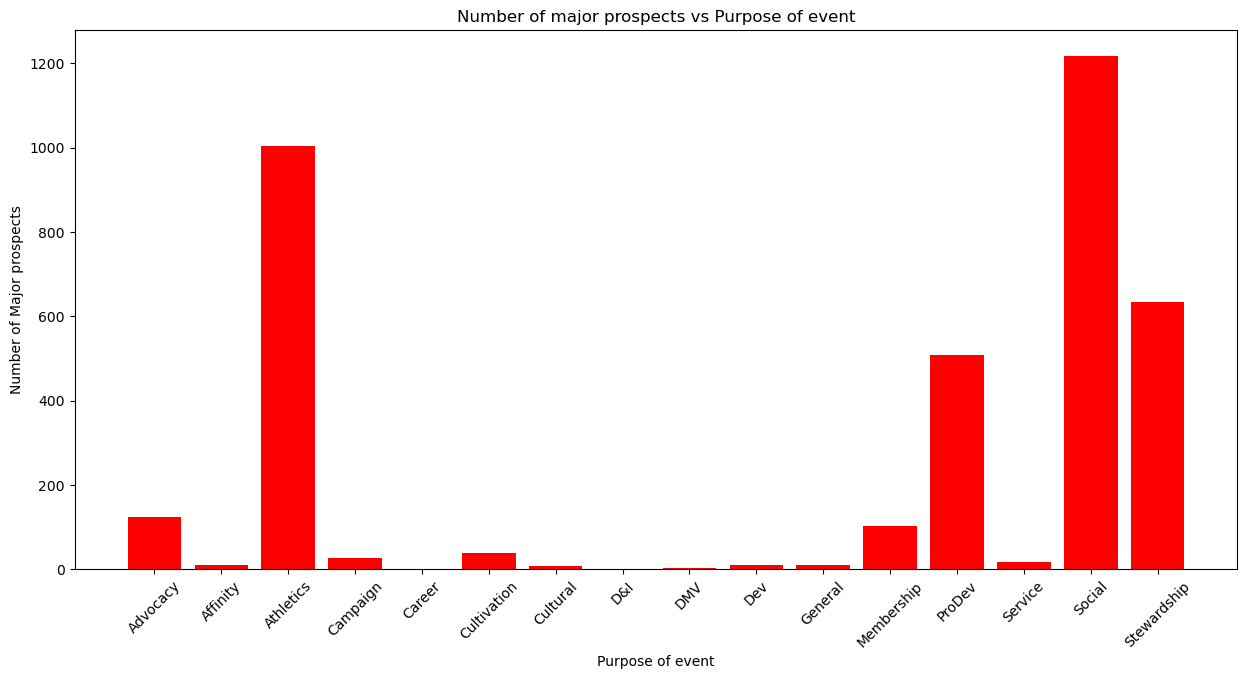

In [67]:
#Major prospects according to Purpose of the Event
plt.figure(figsize=(15,7))
plt.bar(df_purpose_all['purpose_Extracted'],df_purpose_all['Major_Prospects'],color=['red'])
plt.xticks(rotation=45)
plt.xlabel("Purpose of event")
plt.ylabel("Number of Major prospects")
plt.title("Number of major prospects vs Purpose of event")
plt.show()

#### By major prospects
- Major prospects show a significant desire for stewardship events. 
- This is different from first time attendees who do not show this desire. 
- It is recommended to focus on stewardship events for major prospects to be engaged and increase the likelihood of donations. 

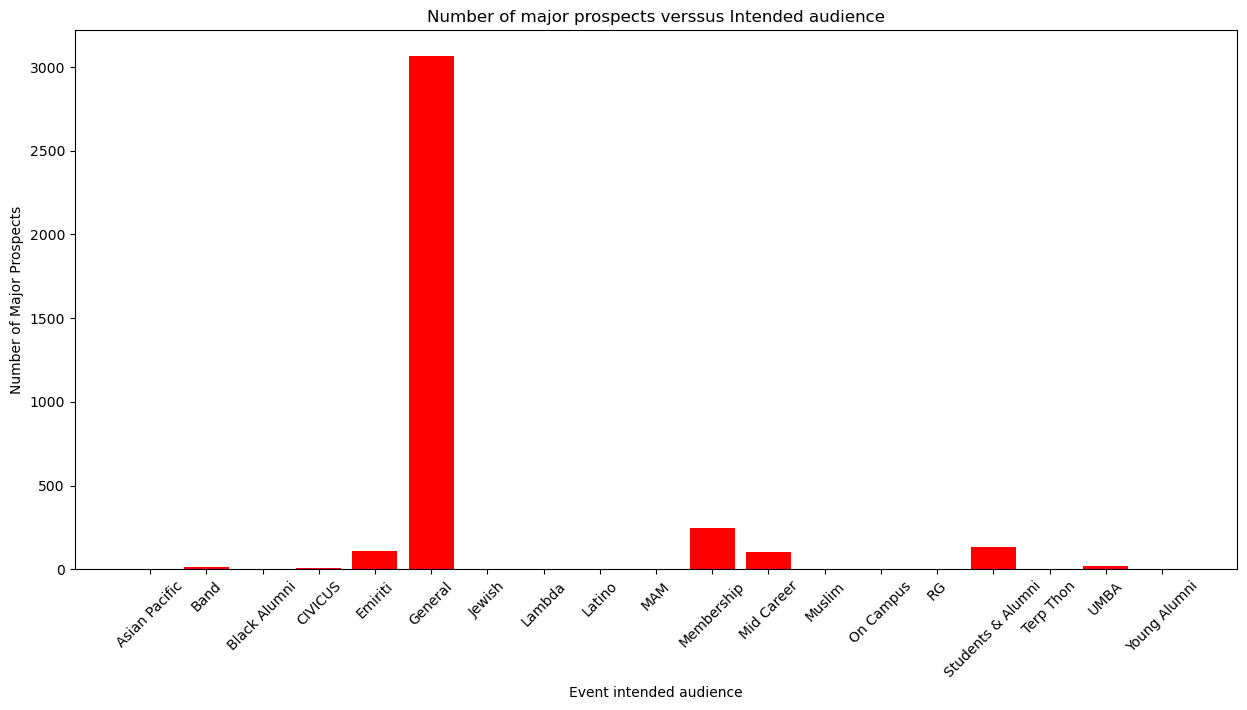

In [68]:
#plotting Number of Major prospects with Intended audience
plt.figure(figsize=(15,7))
plt.bar(df_audience_all['Extracted_Group'],df_audience_all['Major_Prospects'],color=['red'])
plt.xlabel("Event intended audience")
plt.ylabel("Number of Major Prospects")
plt.title("Number of major prospects verssus Intended audience")

plt.xticks(rotation=45)
plt.show()

#### By major prospects
- No strong trends are shown for major prospects. 

## By Month of the Event

/Users/abhijithreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


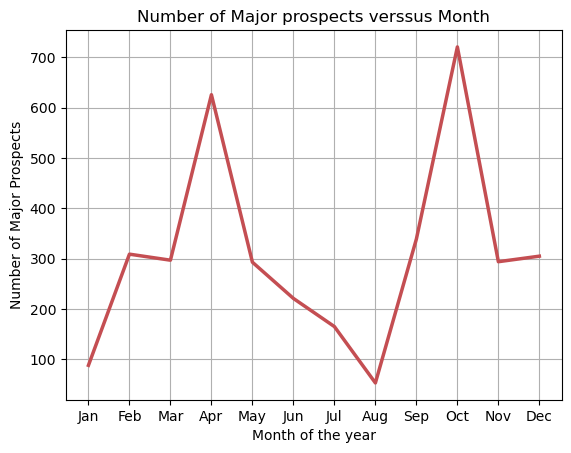

In [69]:
#Major Prospects according to Month
sns.set(rc = {'figure.figsize':(12,7)})
plt.style.use('default')
plot=sns.lineplot(df_ym_majorprospects['month'],df_ym_majorprospects['Major_Prospects'],color='r',linewidth=2.5)
plot.set(xlabel='Month of the year',ylabel='Number of Major Prospects',title='Number of Major prospects verssus Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()



#### By major prospects
- Major prospects show a remarkable trend of engagement in October, surpassing engagement in April, which is different from the other groups.
- It is recommended to prioritize events towards the end of the year for major prospects.

## By Day of the Event

/Users/abhijithreddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


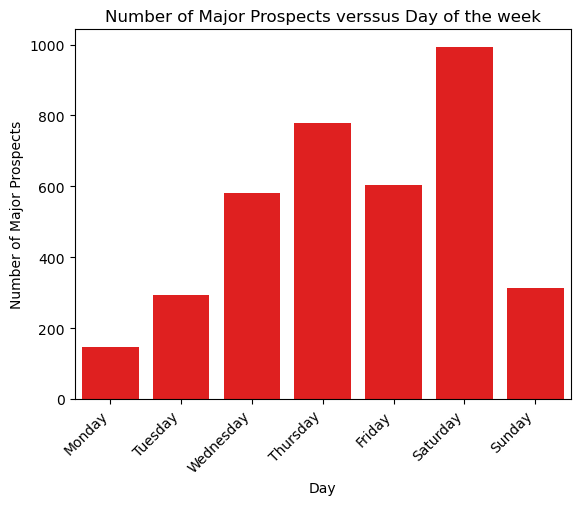

In [70]:
#Plotting Major Prospects with Day of week

sns.set(rc = {'figure.figsize':(12,7)})
plt.style.use('default')
plot=sns.barplot(df_day_majorprospects['Day_of_Week'],df_day_majorprospects['Major_Prospects'],order = day_order,ci=None,color='red')
plot.set(xlabel='Day',ylabel='Number of Major Prospects',title='Number of Major Prospects verssus Day of the week')
plt.xticks(rotation=45,ha='right')
plt.show()

#### By major prospects
- Major prospects show similar trends to overall participants.

# ANOVA TEST

To Identify variables that are correlated to our desired outcomes of higher event attendance of first time attendees and major gift prospect attendees.

In [71]:
df_test = df[['Event_Name', 'Activity_Code', 'Location_Code',
       'Group_Code', 'Event_Date', 'Participated', 'Average_Age', 'First_Time_Attendees',
       'Percentage_First_Time_Attendees', 'Major_Prospects',
       'Percentage_Major_Prospect', 'year', 'age_bins','quarter']]

In [72]:
target_variable = 'Major_Prospects'

for i in ['Activity_Code', 'Location_Code', 'Group_Code', 'age_bins', 'Average_Age', 'First_Time_Attendees','quarter']:
    print('Feature Name: %s'%i)
# A one way ANOVA is used to compare two means from two independent (unrelated) groups using the F-distribution. 
# The null hypothesis for the test is that the two means are equal. Therefore, a significant result means that the two means are unequal.
# Assumption(H0) is that Percentage_Major_Prospect and Prospect are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
    CategoryGroupLists=df_test.groupby(i)[target_variable].apply(list)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is: ', AnovaResults[1])

Feature Name: Activity_Code
P-Value for Anova is:  2.0759561366784466e-60
Feature Name: Location_Code
P-Value for Anova is:  0.00042420081667741223
Feature Name: Group_Code
P-Value for Anova is:  7.624169915036464e-08
Feature Name: age_bins
P-Value for Anova is:  4.334570828187403e-14
Feature Name: Average_Age
P-Value for Anova is:  3.587000049401962e-07
Feature Name: First_Time_Attendees
P-Value for Anova is:  2.441926578284564e-59
Feature Name: quarter
P-Value for Anova is:  0.0956666823019117


In [73]:
target_variable = 'First_Time_Attendees'

for i in ['Activity_Code', 'Location_Code', 'Group_Code', 'age_bins', 'Major_Prospects','quarter']:
    print('Feature Name: %s'%i)
# A one way ANOVA is used to compare two means from two independent (unrelated) groups using the F-distribution. 
# The null hypothesis for the test is that the two means are equal. Therefore, a significant result means that the two means are unequal.
# Assumption(H0) is that Percentage_Major_Prospect and Prospect are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
    CategoryGroupLists=df_test.groupby(i)[target_variable].apply(list)
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is: ', AnovaResults[1])

Feature Name: Activity_Code
P-Value for Anova is:  4.199557137921318e-23
Feature Name: Location_Code
P-Value for Anova is:  0.5358600277268125
Feature Name: Group_Code
P-Value for Anova is:  0.000908235165916202
Feature Name: age_bins
P-Value for Anova is:  0.26402084571299833
Feature Name: Major_Prospects
P-Value for Anova is:  2.6708687003042107e-77
Feature Name: quarter
P-Value for Anova is:  0.13851905147282212


#### Anova Test
- Compare two independent(unrelated) variable groups using F-distribution, to produce P value at the end.
- The null hypothesis for the test is that the two means are equal. Therefore, a significant result means that the two means are unequal. Assumption(Ho) is that Major_Prospects and First_time_attendees are not correlated.
- In terms of First_time_attendence, P value of quarter is 0.138, higher than 5%, which means lower significant level. Thus, other variables are more relatively deserved to explore and highly correlated with First_time_attendence.
- In terms of Major_prospects, P value of quarter is 0.0956, higher than 5%, which means lower significant level. Thus, other variables are more relatively deserved to explore and highly correlated with Major_prospects.

# Linear Regression

## Simple Linear Model Attendence

In [74]:
#use only participation since it has highest correlation
part_df=df[["First_Time_Attendees","Participated"]]
part_df

,First_Time_Attendees,Participated
0,5,63
1,1,7
2,2,28
3,0,3
4,3,22
...,...,...
617,0,2
618,0,76
619,0,68
620,0,118


Text(0.5, 0, 'participated')

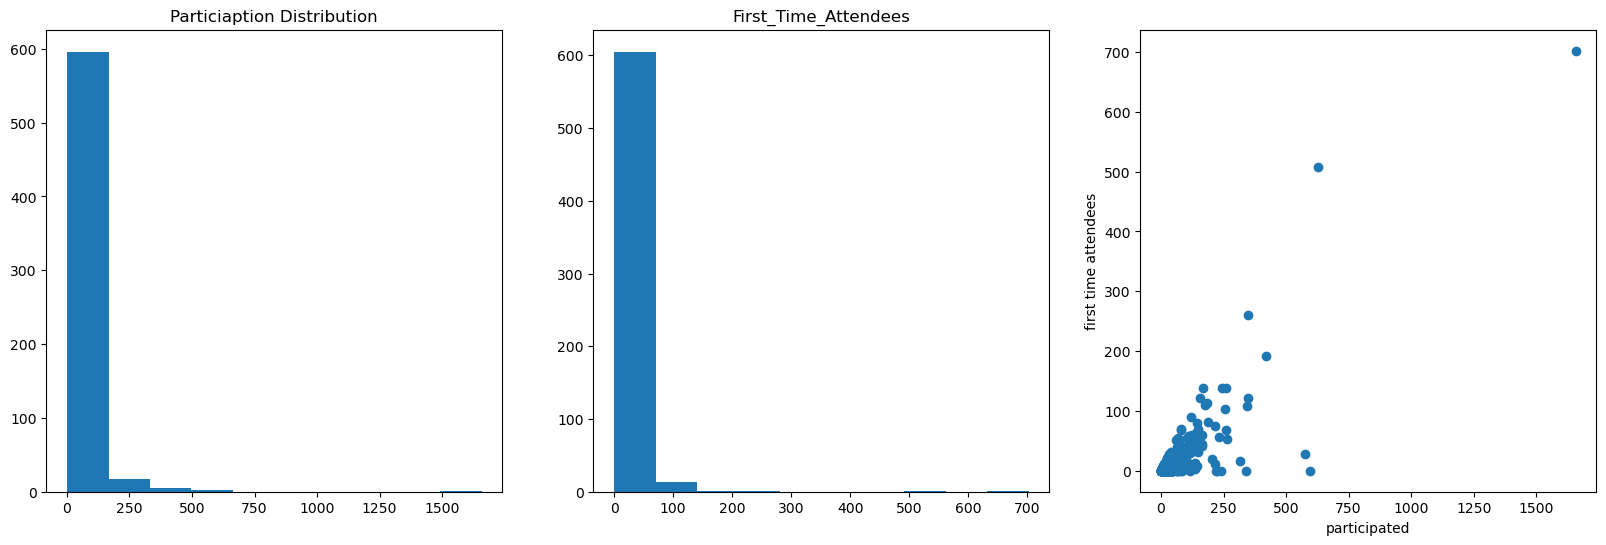

In [75]:
#look at skewness of data
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.hist(part_df["Participated"])
plt.title("Particiaption Distribution")

plt.subplot(132)
plt.hist(part_df["First_Time_Attendees"])
plt.title("First_Time_Attendees")

plt.subplot(133)
plt.scatter(part_df.Participated,part_df.First_Time_Attendees)
plt.ylabel("first time attendees")
plt.xlabel("participated")

In [76]:
#take log to make data more normally distrbuted
part_df["First_Time_Attendees"] = np.log(part_df["First_Time_Attendees"])
part_df["Participated"] = np.log(part_df["Participated"])
part_df

/Users/abhijithreddy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-76-f106cf6688f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_df["First_Time_Attendees"] = np.log(part_df["First_Time_Attendees"])
<ipython-input-76-f106cf6688f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_df["Participated"] = np.log(part_df["Participated"])


,First_Time_Attendees,Participated
0,1.609438,4.143135
1,0.000000,1.945910
2,0.693147,3.332205
3,-inf,1.098612
4,1.098612,3.091042
...,...,...
617,-inf,0.693147
618,-inf,4.330733
619,-inf,4.219508
620,-inf,4.770685


In [77]:
#treat inf values
part_df=part_df[part_df.First_Time_Attendees != -np.inf]
part_df=part_df[part_df.Participated != -np.inf]
part_df

,First_Time_Attendees,Participated
0,1.609438,4.143135
1,0.000000,1.945910
2,0.693147,3.332205
4,1.098612,3.091042
5,0.000000,1.386294
...,...,...
603,3.931826,4.158883
604,3.688879,4.564348
605,4.727388,5.220356
606,3.806662,5.105945


Text(0.5, 0, 'participated')

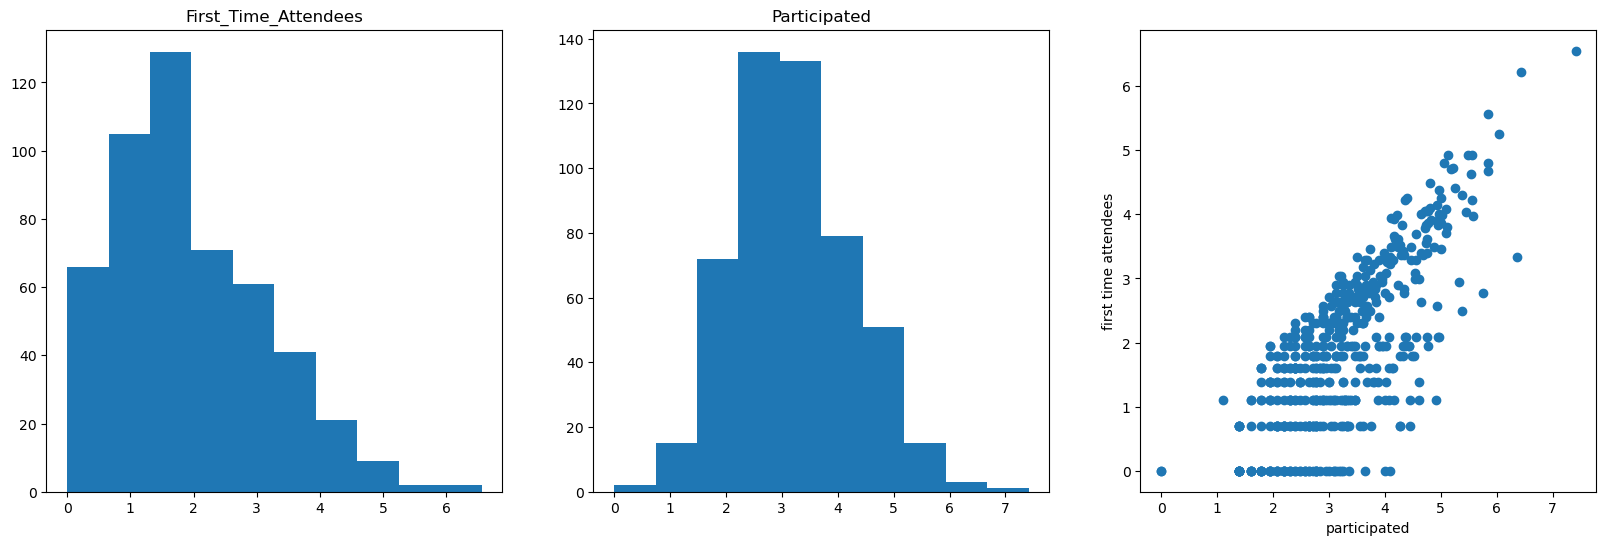

In [78]:
#plot new histogram to see changes
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.hist(part_df["First_Time_Attendees"])
plt.title("First_Time_Attendees")

plt.subplot(1,3,2)
plt.hist(part_df["Participated"])
plt.title("Participated")

plt.subplot(1,3,3)
plt.scatter(part_df.Participated,part_df.First_Time_Attendees)
plt.ylabel("first time attendees")
plt.xlabel("participated")


In [79]:
#define x and y and numpy array
slr_x=part_df[["Participated"]].values
slr_y=part_df[["First_Time_Attendees"]].values

In [80]:
#divide into training and test set
slr_x_train, slr_x_test, slr_y_train, slr_y_test = train_test_split(slr_x,slr_y,test_size=.2, random_state=3)

In [81]:
#model for training set
slr=linear_model.LinearRegression() #creating object for regression
slr.fit(slr_x_train,slr_y_train)  #true

LinearRegression()

In [82]:
#Coefficient and Intercept
print("Coefficient is:", slr.coef_)
print("Intercept is:", slr.intercept_)

Coefficient is: [[0.88578495]]
Intercept is: [-1.00899183]


In [83]:
#R-Square for training set
slr.score(slr_x_train,slr_y_train)

0.548313310631713

In [84]:
#create prediction
y_pred=slr.predict(slr_x_test)

Text(0.5, 1.0, 'First Time Attendees Regression Line')

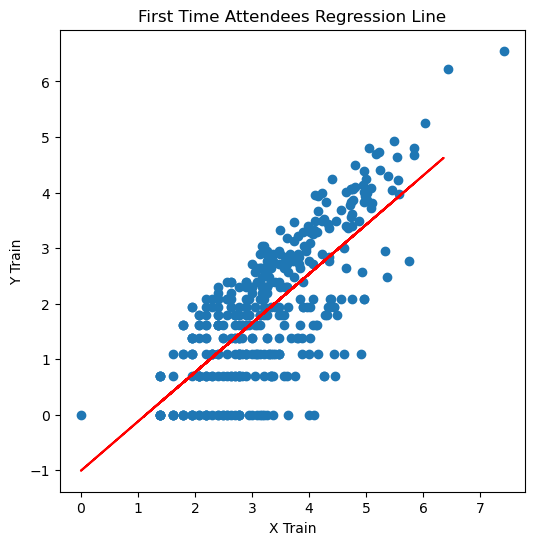

In [85]:
#plot to see regression line
plt.figure(figsize=(6,6))
plt.scatter(slr_x_train, slr_y_train)
plt.plot(slr_x_test,y_pred, color="red")
plt.xlabel("X Train")
plt.ylabel("Y Train")
plt.title("First Time Attendees Regression Line")

In [86]:
#Model for test set
slr.fit(slr_x_test,slr_y_test)  #true

LinearRegression()

In [87]:
#R-Square for test set
slr.score(slr_x_test,slr_y_test)  #true

0.6211493292297183

In [88]:
#compare y_test with predicted values
comp_df=pd.DataFrame({"Actual":slr_y_test.flatten(),"Predicted":y_pred.flatten()}).round(decimals = 3)
comp_df["Error"]=comp_df["Actual"]-comp_df["Predicted"]
comp_df.head()

,Actual,Predicted,Error
0,0.000,1.329,-1.329
1,2.485,1.551,0.934
2,3.332,4.623,-1.291
3,1.609,1.551,0.058
4,3.611,2.702,0.909


In [89]:
#R-Square for test set
print("FIRST TIME ATTENDEES~PARTICIPATION")
print("R Square:", slr.score(slr_x_test,slr_y_test).round(decimals=3))
#metrics
print('MAE:', metrics.mean_absolute_error(slr_y_test, y_pred).round(decimals=3))
print('MSE:', metrics.mean_squared_error(slr_y_test, y_pred).round(decimals=3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(slr_y_test, y_pred)).round(decimals=3))

FIRST TIME ATTENDEES~PARTICIPATION
R Square: 0.621
MAE: 0.68
MSE: 0.618
RMSE: 0.786


## Multiple Linear Model

In [ ]:
#pick variables
ml_df=df[["First_Time_Attendees","Participated","Major_Prospects"]]
ml_df

In [ ]:
#look at skewness of data
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.hist(ml_df["Participated"])
plt.title("Particiaption Distribution")

plt.subplot(132)
plt.hist(ml_df["First_Time_Attendees"])
plt.title("First_Time_Attendees")

plt.subplot(133)
plt.hist(ml_df["Major_Prospects"])
plt.title("Major_Prospects")

In [ ]:
#take log of variables to make data more normal
ml_df["First_Time_Attendees"] = np.log(ml_df["First_Time_Attendees"])
ml_df["Participated"] = np.log(ml_df["Participated"])
ml_df["Major_Prospects"] = np.log(ml_df["Major_Prospects"])
ml_df

In [ ]:
#ml_df["First_Time_Attendees"].replace([np.inf, -np.inf], np.nan, inplace=True)
#ml_df = ml_df.replace(0, pd.np.nan).dropna(axis=0, how='any').fillna(0)

#ml_df["Participated"].replace([np.inf, -np.inf], np.nan, inplace=True)
#ml_df =  ml_df.replace(0, pd.np.nan).dropna(axis=0, how='any').fillna(0)

#ml_df["Major_Prospects"].replace([np.inf, -np.inf], np.nan, inplace=True)
#ml_df =  ml_df.replace(0, pd.np.nan).dropna(axis=0, how='any').fillna(0)
#ml_df

#Treat inf values
ml_df=ml_df[ml_df.First_Time_Attendees != -np.inf]
ml_df=ml_df[ml_df.Participated != -np.inf]
ml_df=ml_df[ml_df.Major_Prospects != -np.inf]
ml_df

In [ ]:

#dropping null values
ml_df=ml_df.dropna()
ml_df

In [ ]:
#plot to see changes in skewness
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.hist(ml_df["First_Time_Attendees"])
plt.title("First_Time_Attendees")

plt.subplot(1,3,2)
plt.hist(ml_df["Participated"])
plt.title("Participated")

plt.subplot(1,3,3)
plt.hist(ml_df["Major_Prospects"])
plt.title("Major_Prospects")


In [ ]:
#define x and y variables and set them as numpy array
#convert to numpy array
ml_x=ml_df[["Participated","Major_Prospects"]].values
ml_y=ml_df[["First_Time_Attendees"]].values
print(ml_x.shape)
print(ml_y.shape)

In [ ]:
#divide into training and test set
ml_x_train, ml_x_test, ml_y_train, ml_y_test = train_test_split(ml_x,ml_y,test_size=.2, random_state=2)
print(ml_x_train.shape, ml_x_test.shape, ml_y_train.shape, ml_y_test.shape)

In [ ]:
#make regression instance
multreg= LinearRegression(fit_intercept=True)

In [ ]:
#train model
multreg.fit(ml_x_train,ml_y_train)

In [ ]:
#Coefficient and Intercept
print("Coefficient is:", multreg.coef_)
print("Intercept is:", multreg.intercept_)

In [ ]:
#R square ofr training model
multreg.score(ml_x_train,ml_y_train)

In [ ]:

#create prediction
y_mlpred=multreg.predict(ml_x_test)

In [ ]:
#test model
multreg.fit(ml_x_test,ml_y_test)

In [ ]:
#R Square for test model
multreg.score(ml_x_test,ml_y_test)

In [ ]:
#compare y_test with predicted values
mlcomp_df=pd.DataFrame({"Actual":ml_y_test.flatten(),"Predicted":y_mlpred.flatten()}).round(decimals = 3)
mlcomp_df["Error"]=mlcomp_df["Actual"]-mlcomp_df["Predicted"]
mlcomp_df.head(10)

In [ ]:
#R-Square for test set
print("FIRST TIME ATTENDEES~PARTICIPATION+MAJOR PROSPECTS")
print("R Square:", multreg.score(ml_x_test,ml_y_test).round(decimals=3))
#metrics
print('MAE:', metrics.mean_absolute_error(ml_y_test, y_mlpred).round(decimals=3))
print('MSE:', metrics.mean_squared_error(ml_y_test, y_mlpred).round(decimals=3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ml_y_test, y_mlpred)).round(decimals=3))

## Multiple Linear Model with Dummies

In [ ]:
#define new df with X and Y variables
cat=df[["First_Time_Attendees","Participated","Major_Prospects","Location_Code","Activity_Code"]]

In [ ]:
#take log of variables to make data more normal
cat["First_Time_Attendees"] = np.log(cat["First_Time_Attendees"])
cat["Participated"] = np.log(cat["Participated"])
cat["Major_Prospects"] = np.log(cat["Major_Prospects"])

In [ ]:
#Treat inf values
cat=cat[cat.First_Time_Attendees != -np.inf]
cat=cat[cat.Participated != -np.inf]
cat=cat[cat.Major_Prospects != -np.inf]
cat

In [ ]:
#dropping null values
cat=cat.dropna()
cat

In [ ]:
cat_X=cat[["Participated","Major_Prospects","Activity_Code","Location_Code"]]

In [ ]:
#get dummines
cat_X=pd.get_dummies(cat_X, columns=["Location_Code","Activity_Code"], drop_first=True)
cat_X

In [ ]:
#convert to numpy array
cat_X=cat_X.values
cat_Y=cat[["First_Time_Attendees"]].values

In [ ]:
print(cat_X.shape)
print(cat_Y.shape)

In [ ]:
#split data
cat_X_train, cat_X_test, cat_Y_train, cat_Y_test=train_test_split(cat_X,cat_Y,test_size=0.2, random_state=2)
print(cat_X_train.shape, cat_X_test.shape, cat_Y_train.shape, cat_Y_test.shape)

In [ ]:
finallr= LinearRegression()
finallr

In [ ]:
#train model
finallr.fit(cat_X_train,cat_Y_train)

In [ ]:
#Coefficient and Intercept
print("Coefficient is:", finallr.coef_)
print("Intercept is:", finallr.intercept_)

In [ ]:
#R square for training model
finallr.score(cat_X_train, cat_Y_train)

In [ ]:
#create prediction
y_finallrpred=finallr.predict(cat_X_test)

In [ ]:
#test model
finallr.fit(cat_X_test, cat_Y_test)

In [ ]:
#R Square for test model
finallr.score(cat_X_test, cat_Y_test)

In [ ]:
#compare y_test with predicted values
finalcomp_df=pd.DataFrame({"Actual":cat_Y_test.flatten(),"Predicted":y_finallrpred.flatten()}).round(decimals = 3)
finalcomp_df["Error"]=finalcomp_df["Actual"]-finalcomp_df["Predicted"]
finalcomp_df.head(10)

In [ ]:
#R-Square for test set
print("FIRST TIME ATTENDEES~PARTICIPATION+MAJOR PROSPECTS+LOCATION CODE+ACITIVITY CODE")
print("R Square:", finallr.score(cat_X_test, cat_Y_test).round(decimals=3))
#metrics
print('MAE:', metrics.mean_absolute_error(cat_Y_test, y_finallrpred).round(decimals=3))
print('MSE:', metrics.mean_squared_error(cat_Y_test, y_finallrpred).round(decimals=3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(cat_Y_test, y_finallrpred)).round(decimals=3))

## First Time Attendees Linear Regression with dummies

In [ ]:
#X and Y arrays
X = df[[ 'Activity_Code', 'Location_Code', 'Participated', 'Major_Prospects']]
y = df['First_Time_Attendees']

In [ ]:

OneHotEncoder(drop='first').fit(X).categories_

In [ ]:
#convert string to float 
X1 = X.apply(pd.to_numeric, errors='coerce')
Y1 = y.apply(pd.to_numeric, errors='coerce')
X1.fillna(0, inplace=True)
Y1.fillna(0, inplace=True)

In [ ]:
X1

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.4, random_state=101)
#Create and train the model
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
# The coefficients
print('Coefficients: \n', lm.coef_)

**Predicting** **Test** **Data**

In [ ]:
 #Use lm.predict() to predict off the X_test set of the data
 predictions = lm.predict( X_test)

In [ ]:
 #Create a scatterplot of the real test values versus the predicted values. **
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

**Evaluating** **the** **Model**

In [ ]:
#R-Square for test set
print("FIRST TIME ATTENDEES~PARTICIPATION + MAJOR PROSPECTS + LOCATION CODE + ACTIVITY CODE")
print("R Square:", lm.score(X_test,y_test).round(decimals=3))
#metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions).round(decimals=3))
print('MSE:', metrics.mean_squared_error(y_test, predictions).round(decimals=3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)).round(decimals=3))

**Residuals**

In [ ]:
sns.distplot((y_test-predictions),bins=50);

**Conclusion**

In [ ]:
#Recreate the dataframe below
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

## Simple Linear Model Major Prospects

In [ ]:
#use only participation since it has highest correlation
part_df=df[["Major_Prospects","Participated"]]
part_df

In [ ]:
#look at skewness of data
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.hist(part_df["Participated"])
plt.title("Particiaption Distribution")

plt.subplot(132)
plt.hist(part_df["Major_Prospects"])
plt.title("Major_Prospects")

plt.subplot(133)
plt.scatter(part_df.Participated,part_df.Major_Prospects)
plt.ylabel("Major_Prospects")
plt.xlabel("participated")

In [ ]:
#take log to make data more normally distrbuted
part_df["Major_Prospects"] = np.log(part_df["Major_Prospects"])
part_df["Participated"] = np.log(part_df["Participated"])
part_df

In [ ]:
#treat inf values
part_df=part_df[part_df.Major_Prospects != -np.inf]
part_df=part_df[part_df.Participated != -np.inf]
part_df

In [ ]:
#plot new histogram to see changes
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.hist(part_df["Major_Prospects"])
plt.title("Major_Prospects")

plt.subplot(1,3,2)
plt.hist(part_df["Participated"])
plt.title("Participated")

plt.subplot(1,3,3)
plt.scatter(part_df.Participated,part_df.Major_Prospects)
plt.ylabel("Major_Prospects")
plt.xlabel("participated")


In [ ]:
#define x and y and numpy array
slr_x=part_df[["Participated"]].values
slr_y=part_df[["Major_Prospects"]].values

In [ ]:
#divide into training and test set
slr_x_train, slr_x_test, slr_y_train, slr_y_test = train_test_split(slr_x,slr_y,test_size=.2, random_state=2)

In [ ]:
#model for training set
slr=linear_model.LinearRegression() #creating object for regression
slr.fit(slr_x_train,slr_y_train)  #true

In [ ]:
#Coefficient and Intercept
print("Coefficient is:", slr.coef_)
print("Intercept is:", slr.intercept_)

In [ ]:
#R-Square for training set
slr.score(slr_x_train,slr_y_train)

In [ ]:
#create prediction
y_pred=slr.predict(slr_x_test)

In [ ]:
#plot to see regression line
plt.figure(figsize=(6,6))
plt.scatter(slr_x_train, slr_y_train)
plt.plot(slr_x_test,y_pred, color="red")
plt.xlabel('X Train')
plt.ylabel('Y Train')
plt.title("Major_Prospects Regression Line")

In [ ]:
#Model for test set
slr.fit(slr_x_test,slr_y_test)  #true

In [ ]:
#R-Square for test set
slr.score(slr_x_test,slr_y_test)  #true

In [ ]:
#compare y_test with predicted values
comp_df=pd.DataFrame({"Actual":slr_y_test.flatten(),"Predicted":y_pred.flatten()}).round(decimals = 3)
comp_df["Error"]=comp_df["Actual"]-comp_df["Predicted"]
comp_df.head()

In [ ]:
#R-Square for test set
print("MAJOR PROSPECTS~PARTICIPATION")
print("R Square:", slr.score(slr_x_test,slr_y_test).round(decimals=3))
#metrics
print('MAE:', metrics.mean_absolute_error(slr_y_test, y_pred).round(decimals=3))
print('MSE:', metrics.mean_squared_error(slr_y_test, y_pred).round(decimals=3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(slr_y_test, y_pred)).round(decimals=3))

## Multiple Linear Model-Major Prospects

In [ ]:
#pick variables
ml_df=df[["First_Time_Attendees","Participated","Major_Prospects"]]
ml_df

In [ ]:
#look at skewness of data
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.hist(ml_df["Participated"])
plt.title("Particiaption Distribution")

plt.subplot(132)
plt.hist(ml_df["First_Time_Attendees"])
plt.title("First_Time_Attendees")

plt.subplot(133)
plt.hist(ml_df["Major_Prospects"])
plt.title("Major_Prospects")

In [ ]:
#take log of variables to make data more normal
ml_df["First_Time_Attendees"] = np.log(ml_df["First_Time_Attendees"])
ml_df["Participated"] = np.log(ml_df["Participated"])
ml_df["Major_Prospects"] = np.log(ml_df["Major_Prospects"])
ml_df

In [ ]:
#ml_df["First_Time_Attendees"].replace([np.inf, -np.inf], np.nan, inplace=True)
#ml_df = ml_df.replace(0, pd.np.nan).dropna(axis=0, how='any').fillna(0)

#ml_df["Participated"].replace([np.inf, -np.inf], np.nan, inplace=True)
#ml_df =  ml_df.replace(0, pd.np.nan).dropna(axis=0, how='any').fillna(0)

#ml_df["Major_Prospects"].replace([np.inf, -np.inf], np.nan, inplace=True)
#ml_df =  ml_df.replace(0, pd.np.nan).dropna(axis=0, how='any').fillna(0)
#ml_df

#Treat inf values
ml_df=ml_df[ml_df.First_Time_Attendees != -np.inf]
ml_df=ml_df[ml_df.Participated != -np.inf]
ml_df=ml_df[ml_df.Major_Prospects != -np.inf]
ml_df

In [ ]:

#dropping null values
ml_df=ml_df.dropna()
ml_df

In [ ]:
#plot to see changes in skewness
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.hist(ml_df["First_Time_Attendees"])
plt.title("First_Time_Attendees")

plt.subplot(1,3,2)
plt.hist(ml_df["Participated"])
plt.title("Participated")

plt.subplot(1,3,3)
plt.hist(ml_df["Major_Prospects"])
plt.title("Major_Prospects")


In [ ]:
#define x and y variables and set them as numpy array
#convert to numpy array
ml_x=ml_df[["Participated","First_Time_Attendees"]].values
ml_y=ml_df[["Major_Prospects"]].values
print(ml_x.shape)
print(ml_y.shape)

In [ ]:
#divide into training and test set
ml_x_train, ml_x_test, ml_y_train, ml_y_test = train_test_split(ml_x,ml_y,test_size=.2, random_state=2)
print(ml_x_train.shape, ml_x_test.shape, ml_y_train.shape, ml_y_test.shape)

In [ ]:
#make regression instance
multreg= LinearRegression(fit_intercept=True)

In [ ]:
#train model
multreg.fit(ml_x_train,ml_y_train)

In [ ]:
#Coefficient and Intercept
print("Coefficient is:", multreg.coef_)
print("Intercept is:", multreg.intercept_)

In [ ]:
#R square ofr training model
multreg.score(ml_x_train,ml_y_train)

In [ ]:

#create prediction
y_mlpred=multreg.predict(ml_x_test)

In [ ]:
#test model
multreg.fit(ml_x_test,ml_y_test)

In [ ]:
#R Square for test model
multreg.score(ml_x_test,ml_y_test)

In [ ]:
#compare y_test with predicted values
mlcomp_df=pd.DataFrame({"Actual":ml_y_test.flatten(),"Predicted":y_mlpred.flatten()}).round(decimals = 3)
mlcomp_df["Error"]=mlcomp_df["Actual"]-mlcomp_df["Predicted"]
mlcomp_df.head(10)

In [ ]:
#R-Square for test set
print("FIRST TIME ATTENDEES~PARTICIPATION+MAJOR PROSPECTS")
print("R Square:", multreg.score(ml_x_test,ml_y_test).round(decimals=3))
#metrics
print('MAE:', metrics.mean_absolute_error(ml_y_test, y_mlpred).round(decimals=3))
print('MSE:', metrics.mean_squared_error(ml_y_test, y_mlpred).round(decimals=3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ml_y_test, y_mlpred)).round(decimals=3))

## Major Prospect Linear Regression with dummies

In [ ]:
#X and Y arrays
X = df[[ 'Activity_Code', 'Location_Code', 'Participated', 'First_Time_Attendees']]
y = df['Major_Prospects']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder(drop='first').fit(X).categories_

In [ ]:
#convert string to float 
X1 = X.apply(pd.to_numeric, errors='coerce')
Y1 = y.apply(pd.to_numeric, errors='coerce')
X1.fillna(0, inplace=True)
Y1.fillna(0, inplace=True)

In [ ]:
X1

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.4, random_state=101)
#Create and train the model
lm = LinearRegression()
lm.fit(X_train,y_train)

**Residuals**

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
#Recreate the dataframe below
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients